# **Project Title: Laptop Price Prediction for SmartTech Co.**

## Project Phases:
1. Data importing
2. Data Preprocessing
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Model Development:
6. Hyperparameter Tuning
7. Real-time Predictions:
8. Interpretability and Insights:
9. Power BI Dashboard


ML PROBLEM - Regression problem- for given columns we need to predict the laptop price

## Importing all libraries

In [ ]:
# import all libraries
import numpy as np
import pandas as pd


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Display matplotlib plots inside the notebook
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset and Data exploration

In [ ]:
# import the file from drive onto colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to check on which drive location dataset is
!ls /content/drive/MyDrive/OdinSchool/ML/Capstone_project2/

laptop.csv


In [ ]:
# import pandas as pd
df = pd.read_csv(r'/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/laptop.csv', encoding='ISO-8859–1')
df.head()    # first 5 rows
# df.tail()  #last 5

# encoding='ISO-8859–1'- If the file has any non-UTF-8 characters (like accented letters or special symbols like €, ñ, é, ü, á, ç, ß), decode them using the ISO-8859-1 standard.

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


- Looking at the dataset, we can see that some columns such as ScreenResolution and Cpu, Memory, GPU have alphanumeric data (combination of letters and numbers, often including symbols, used for text and identification) while other features consist of purely numerical or alphabetical values. These data would need to be filtered and engineered later.

- To avoid any complications and error-prone predictions, useless features such as “Unamed:0”,“Unamed:0.1" will be removed from the dataset.

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
# Gives summary of the dataset like columns, number of columns, non null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# describe the dataset- using statistical
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [ ]:
# data set shape
print(f"The Laptop dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The Laptop dataset has 1303 rows and 13 columns.


In [ ]:
#checking unique values
df.nunique()
# df.unique - lists the  unique value  & df.nunique - lists the  unique value count

,0
Unnamed: 0.1,1303
Unnamed: 0,1273
Company,19
TypeName,6
Inches,25
ScreenResolution,40
Cpu,118
Ram,10
Memory,40
Gpu,110


In [ ]:
# check if dataset has null or missing values
df.isnull().sum()

# there are 30 missing values in each column

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [ ]:
df[df.isnull().any(axis=1)].head()  # inspect where the nulls are

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.duplicated().sum() #count the total number of duplicate rows in a DataFrame  Can change post feature engineering

np.int64(0)

## Data preprocessing

In [ ]:
# dropping columns - Unnamed: 0 and Unnamed: 0.1
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

Columns Unnamed: 0 and Unnamed: 0.1 were dropped as they don't contain any useful information for model training later.

In [ ]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [ ]:
# checking if any null rows are present
null_row_count = df.isnull().any(axis=1).sum()
print(f'Total null count: {null_row_count}')

# row indices where all columns are null
null_rows = df.index[df.isnull().all(axis=1)].tolist()
print(f'null row pd index : {null_rows}')

Total null count: 30
null row pd index : [20, 46, 50, 115, 125, 148, 190, 209, 267, 336, 350, 478, 567, 616, 625, 629, 666, 699, 726, 747, 753, 774, 922, 923, 938, 978, 994, 1060, 1202, 1245]


In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


checking on duplicate rows and keeping the first records and dropping the duplicates

In [ ]:
# checking duplicated columns
df.duplicated().sum()

np.int64(29)

In [ ]:
df[df.duplicated()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [ ]:
#dropping duplicate records
df.drop_duplicates(keep='first',inplace=True)

#resetting index after dropping duplicates
df.reset_index(drop=True,inplace=True)

Dropping rows (duplicates, nulls, etc.) can leave non-sequential indices.

Resetting the pandas dataframes index ensures the DataFrame has clean, consecutive row numbers.

drop=True avoids cluttering your DataFrame with the old index column.

In [ ]:
#checking column datatypes as most are object dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 107.0+ KB


In [ ]:
df.shape   # after removing nulls and duplicates

(1244, 11)

#### Inspecting each columns

#### Operating system

In [ ]:
# listing unique companies and the companies Op system
pd.set_option('display.max_colwidth',None)
models=df.groupby('Company').agg({'OpSys':lambda x: set(x)})
models

,OpSys
Company,
Acer,"{Windows 10, Chrome OS, Linux}"
Apple,"{Mac OS X, macOS}"
Asus,"{No OS, Windows 10 S, Windows 10, Chrome OS, Linux}"
Chuwi,{Windows 10}
Dell,"{Windows 7, Windows 10, Chrome OS, Linux}"
Fujitsu,{Windows 10}
Google,{Chrome OS}
HP,"{Windows 7, Windows 10, Chrome OS, No OS}"
Huawei,{Windows 10}


In [ ]:
#categorizing OpSys
df['OpSys']=df['OpSys'].apply(lambda x: 'Windows 11' if 'Windows 10 S' in x else 'macOS' if 'Mac OS X' in x else x)
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Linux', 'Windows 11', 'Chrome OS',
       'Windows 7', 'Android'], dtype=object)

In [ ]:
df['OpSys'].dtype   #object dtype

dtype('O')

#### TypeName

In [ ]:
# Unique operating systems  # it has correct dtype
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

#### Inches

In [ ]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [ ]:
#error value ?
df[df['Inches']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
465,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [ ]:
df['Inches'].value_counts()

,count
Inches,
15.6,621
14,188
17.3,162
13.3,157
12.5,38
11.6,29
12,6
13.9,6
13.5,5


In [ ]:
# from internet its 15.6 but using mode to get the data s most realistic value
df['Inches'] = df['Inches'].replace('?', df['Inches'].mode()[0]).astype(float)

# df['Inches'].astype('float') also changed the datatype of the column
# mode()[0] - chooses the most frequent value

In [ ]:
df.loc[465]  # using row indice checking the changes

,465
Company,Dell
TypeName,Workstation
Inches,15.6
ScreenResolution,Full HD 1920x1080
Cpu,Intel Core i7 7700HQ 2.8GHz
Ram,8GB
Memory,256GB SSD
Gpu,Nvidia Quadro M1200
OpSys,Windows 10
Weight,1.78kg


In [ ]:
df['Inches'].dtype

dtype('float64')

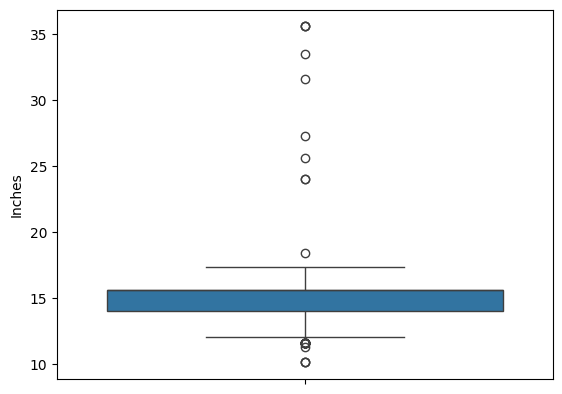

In [ ]:
#checking for outliers
sns.boxplot(df['Inches'])
plt.show()

In [ ]:
#replace outliers using IQR method and capping the outliers
Q1 = df['Inches'].quantile(0.25)
Q3 = df['Inches'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['Inches'] = df['Inches'].clip(lower=lower_bound, upper=upper_bound)
# Cap outliers to whiskers
# clip() replaces values below lower_bound with lower_bound and values above upper_bound with upper_bound.

<Axes: ylabel='Inches'>

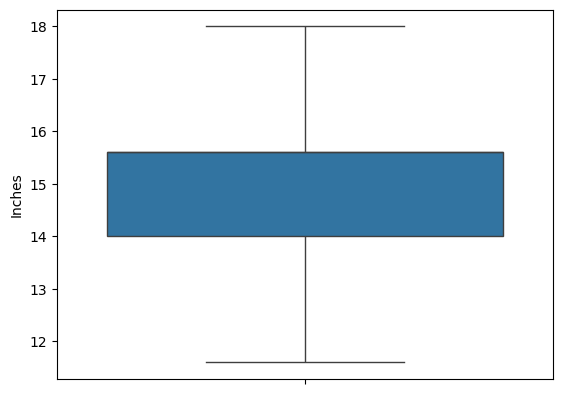

In [ ]:
sns.boxplot(df['Inches']) #post clipping the outliers

#### Screen Resolution

In [ ]:
#will extract important details from the column for new columns
df['ScreenResolution'].unique()

# df['ScreenResolution'].dtype  object as seen above

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [ ]:
df['ScreenResolution'].isnull().sum()

np.int64(0)

##### Display column

In [ ]:
#creating function to categorize display type from above values in ScreenResolution
def category(x):
    if isinstance(x, str):  # check if x is a string
        if 'Full HD' in x:
            return 'Full HD'
        elif 'Retina Display' in x:
            return 'Retina Display'
        elif '4K Ultra HD' in x:
            return '4K Ultra HD'
        elif 'Quad HD+' in x:
            return 'Quad HD+'
        else:
            return 'Normal'
    else:
        return 'Normal'


#creating new column 'Display' using above function
df['Display']=df['ScreenResolution'].apply(category)

In [ ]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Normal
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD


In [ ]:
df['Display'].unique()

array(['Retina Display', 'Normal', 'Full HD', 'Quad HD+', '4K Ultra HD'],
      dtype=object)

##### IPS column

In [ ]:
#creating new column 'IPS' using values from Screen Resolution  -- makes difference in price evaluation of laptops
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and 'IPS' in x else 0)    # checks if IPS word is there and if its string( not NaN)

df['IPS'].unique()

array([1, 0])

In [ ]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Retina Display,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Normal,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,0


##### Touchscreen column

In [ ]:
#creating new column 'TouchScreen' using values from Screen Resolution
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and'Touchscreen' in x else 0)

df['Touchscreen'].unique()

array([0, 1])

##### X_res and Y_res column

In [ ]:
# #extracting X and Y resolution from values in Screen Resolution
resolutions=df['ScreenResolution'].str.split('x',n=1,expand=True)    #n=1 first word
resolutions.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [ ]:
df['X_res']=resolutions[0]
df['Y_res']=resolutions[1]

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res
325,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,53226.72,Full HD,0,0,Full HD 1920,1080


In [ ]:
df['X_res']=df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])  # removing the string from xres

#changing datatypes
df['X_res']= df['X_res'].astype('int')
df['Y_res']= df['Y_res'].astype('int')

In [ ]:
df['X_res'].unique()

array([2560, 1440, 1920, 2880, 1366, 2304, 3200, 2256, 3840, 2160, 1600,
       2736, 2400])

In [ ]:
df['Y_res'].unique()

array([1600,  900, 1080, 1800,  768, 1440, 1504, 2160, 1824, 1200])

In [ ]:
#dropping screen resolution as their is no more need of the column
df.drop(columns=['ScreenResolution'],inplace=True)

#### CPU

In [ ]:
#Cpu also conatins alot of unique value that contains laptop processor type
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

##### Processor column

In [ ]:
#creating function to extract processor from values in CPU
def category(x):
  if 'i3' in x:
    return 'Intel Core i3'
  elif 'i5' in x:
    return 'Intel Core i5'
  elif 'i7' in x:
    return 'Intel Core i7'
  elif 'Pentium' in x:
    return 'Intel Pentium'
  elif 'Celeron' in x:
    return 'Intel Celeron'
  elif 'Atom' in x:
    return 'Intel Atom'
  elif 'E-Series' in x:
    return 'AMD E-Series'
  elif 'FX' in x:
    return 'AMD FX'
  elif 'Ryzen' in x:
    return 'AMD Ryzen'
  elif 'A4' in x:
    return 'AMD A4-Series'
  elif 'A6' in x:
    return 'AMD A6-Series'
  elif 'A8' in x:
    return 'AMD A8-Series'
  elif 'A9' in x:
    return 'AMD A9-Series'
  elif 'A10' in x:
    return 'AMD A10-Series'
  elif 'A12' in x:
    return 'AMD A12-Series'
  elif 'Cortex' in x:
    return 'Samsung Cortex'
  else:
    return 'Other Intel Processor'


  #creating new column processor using above function
df['Processor']=df['Cpu'].apply(category)

In [ ]:
df['Processor'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series', 'Intel Core i3',
       'Other Intel Processor', 'AMD E-Series', 'Intel Atom',
       'AMD A6-Series', 'Intel Celeron', 'AMD Ryzen', 'Intel Pentium',
       'AMD FX', 'AMD A10-Series', 'AMD A8-Series', 'AMD A12-Series',
       'AMD A4-Series', 'Samsung Cortex'], dtype=object)

In [ ]:
#dropping CPU as their is no need of this column anymore
df.drop(columns=['Cpu'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor
296,Lenovo,Notebook,15.6,4GB,1TB HDD,Intel HD Graphics 505,No OS,2.2kg,19180.2672,Normal,0,0,1366,768,Intel Pentium


#### RAM

In [ ]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [ ]:
# seperating GB from ram
df['Ram']=df['Ram'].str.replace('GB','').astype('int')   #also converting dtype to int

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor
847,Dell,Workstation,15.6,8,1TB HDD,Nvidia Quadro M620,Windows 10,2.23kg,94731.84,Full HD,0,0,1920,1080,Intel Core i7


#### Memory

In [ ]:
# contain information like SSD, HDD, Hybrid, Flash Storage
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
#checking error value
df[df['Memory']=='?']

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor
749,Dell,Notebook,15.6,16,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656,Full HD,0,0,1920,1080,Intel Core i7


In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,209
500GB HDD,121
512GB SSD,112
128GB SSD + 1TB HDD,92
128GB SSD,72
256GB SSD + 1TB HDD,71
32GB Flash Storage,35
2TB HDD,16


In [ ]:
df['Memory'] = df['Memory'].replace('?', df['Memory'].mode()[0])
# replacing error value with most mode

In [ ]:
df.loc[749]

,749
Company,Dell
TypeName,Notebook
Inches,15.6
Ram,16
Memory,256GB SSD
Gpu,AMD Radeon R7 M445
OpSys,Windows 10
Weight,2.3kg
Price,62938.0656
Display,Full HD


##### SSD column

In [ ]:
#creating function to extract and categorize SSD
def category(x):
  if '8GB SSD' in x:
    return 8
  elif '16GB SSD' in x:
    return 16
  elif '32GB SSD' in x:
    return 32
  elif '64GB SSD' in x:
    return 64
  elif '128GB SSD' in x:
    return 128
  elif '180GB SSD' in x:
    return 180
  elif '240GB SSD' in x:
    return 240
  elif '256GB SSD' in x:
    return 256
  elif '512GB SSD' in x:
    return 512
  elif '1TB SSD' in x:
    return 1000
  else:
    return 0

#creating new column SSD using above function
df['SSD']=df['Memory'].apply(category)

In [ ]:
df['SSD'].unique()

array([   8,    0,  256,  512,   32,   64, 1000,   16,  180,  240])

In [ ]:
df['SSD'].dtype

dtype('int64')

##### HDD column

In [ ]:
#creating function to extract and categorize HDD
def category(x):
  if '32GB HDD'in x:
    return 32
  elif '128GB HDD' in x:
    return 128
  elif '500GB HDD' in x:
    return 500
  elif '1TB HDD' in x:
    return 1000
  elif '1.0TB HDD' in x:
    return 1000
  elif '2TB HDD' in x:
    return 2000
  else:
    return 0

#creating new column HDD using above function
df['HDD']=df['Memory'].apply(category)

In [ ]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128])

In [ ]:
df['HDD'].dtype

dtype('int64')

##### Flash storage column

In [ ]:
#similarly creating function to extract flash storage
def category(x):
  if '16GB Flash' in x:
    return 16
  elif '32GB Flash' in x:
    return 32
  elif '64GB Flash' in x:
    return 64
  elif '128GB Flash' in x:
    return 128
  elif '256GB Flash' in x:
    return 256
  elif '512GB Flash' in x:
    return 512
  else:
    return 0

#creating new column flash stoarage using above function
df['Flash_Storage']=df['Memory'].apply(category)

In [ ]:
df['Flash_Storage'].unique()

array([  0, 128, 256,  64,  32,  16, 512])

In [ ]:
df['Flash_Storage'].dtype

dtype('int64')

##### Hybrid_Storage column

In [ ]:
#creating new column hybrid storage
df['Hybrid_Storage']=df['Memory'].apply(lambda x: 508 if '508GB Hybrid' in x else 1000 if '1.0TB Hybrid' in x else 0)

df['Hybrid_Storage'].unique()

array([   0, 1000,  508])

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor,SSD,HDD,Flash_Storage,Hybrid_Storage
1232,Dell,Notebook,15.6,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.52,Normal,0,0,1366,768,Intel Core i3,0,1000,0,0


In [ ]:
df['Hybrid_Storage'].dtype

dtype('int64')

In [ ]:
#dropping memory as values are extracted
df.drop(columns=['Memory'],inplace=True)

#### GPU

In [ ]:
#GPU also contains lot of unique values that contain information like GPu Brand Name
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [ ]:
#creating new column GPU Brand
df['Gpu_Brand']=df['Gpu'].apply(lambda x: x.split()[0])   # x.split() splits based on spaces with 0 - first word

df['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [ ]:
#dropping GPU column as their is no more need
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand
977,Toshiba,Notebook,13.3,4,Windows 10,1.2kg,63669.6,Full HD,0,0,1920,1080,Intel Core i5,8,0,0,0,Intel


#### Weight

In [ ]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [ ]:
#checking error value
df[df['Weight']=='?']

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand
201,Dell,Ultrabook,13.3,8,Windows 10,?,77202.72,Full HD,0,0,1920,1080,Intel Core i7,256,0,0,0,Intel


In [ ]:
df['Weight'].value_counts()

,count
Weight,
2.2kg,106
2.1kg,57
2.4kg,41
2.3kg,37
2.5kg,37
...,...
3.52kg,1
2.21kg,1
2.191kg,1


In [ ]:
#replacing error value with mode and removing kg
df['Weight'] = df['Weight'].replace('?', df['Weight'].mode()[0])
df['Weight']=df['Weight'].str.replace('kg','')

#changing dataype of weight
df['Weight']=df['Weight'].astype('float')

In [ ]:
df.loc[201]

,201
Company,Dell
TypeName,Ultrabook
Inches,13.3
Ram,8
OpSys,Windows 10
Weight,2.2
Price,77202.72
Display,Full HD
IPS,0
Touchscreen,0


<Axes: ylabel='Weight'>

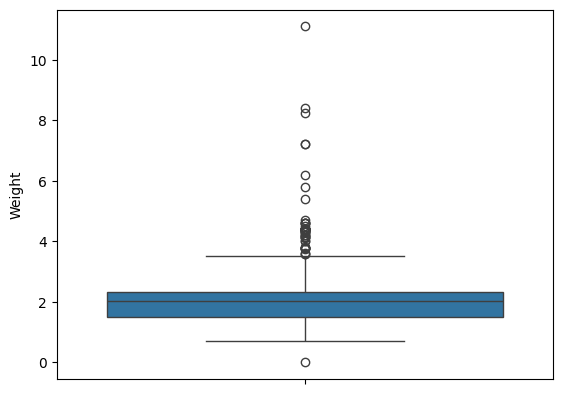

In [ ]:
#checking Outliers in weight
sns.boxplot(df['Weight'])

In [ ]:
#replacing outliers using IQR method
Q1=df['Weight'].quantile(0.25)
Q3=df['Weight'].quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df['Weight'].clip(lower_limit,upper_limit,inplace=True)

<Axes: ylabel='Weight'>

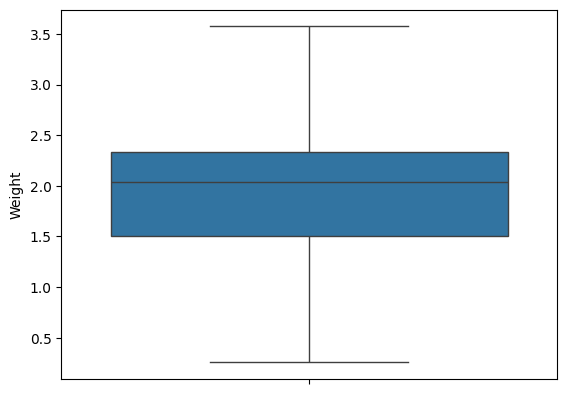

In [ ]:
sns.boxplot(df['Weight'])

#### Dataset Structuring :

In [ ]:
#reaaranging columns
df=df[['Company','TypeName','OpSys','Processor','Inches', 'Display', 'IPS', 'Touchscreen', 'X_res', 'Y_res',  'Ram', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid_Storage', 'Gpu_Brand', 'Weight','Price']]

In [ ]:
df.head()

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand,Weight,Price
0,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,8,0,0,0,Intel,1.37,71378.6832
1,Apple,Ultrabook,macOS,Intel Core i5,13.3,Normal,0,0,1440,900,8,0,0,128,0,Intel,1.34,47895.5232
2,HP,Notebook,No OS,Intel Core i5,15.6,Full HD,0,0,1920,1080,8,256,0,0,0,Intel,1.86,30636.0000
3,Apple,Ultrabook,macOS,Intel Core i7,15.4,Retina Display,1,0,2880,1800,16,512,0,0,0,AMD,1.83,135195.3360
4,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,256,0,0,0,Intel,1.37,96095.8080


In [ ]:
df.info() # all dtypes correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1244 non-null   object 
 1   TypeName        1244 non-null   object 
 2   OpSys           1244 non-null   object 
 3   Processor       1244 non-null   object 
 4   Inches          1244 non-null   float64
 5   Display         1244 non-null   object 
 6   IPS             1244 non-null   int64  
 7   Touchscreen     1244 non-null   int64  
 8   X_res           1244 non-null   int64  
 9   Y_res           1244 non-null   int64  
 10  Ram             1244 non-null   int64  
 11  SSD             1244 non-null   int64  
 12  HDD             1244 non-null   int64  
 13  Flash_Storage   1244 non-null   int64  
 14  Hybrid_Storage  1244 non-null   int64  
 15  Gpu_Brand       1244 non-null   object 
 16  Weight          1244 non-null   float64
 17  Price           1244 non-null   f

In [ ]:
# checking only the numeric columns
numeric_data= df.select_dtypes(include=("number"))
numeric_data.corr()

# Returns a correlation matrix (values range from -1 to +1):
# +1 → strong positive correlation
# -1 → strong negative correlation
# 0 → no correlation

,Inches,IPS,Touchscreen,X_res,Y_res,Ram,SSD,HDD,Flash_Storage,Hybrid_Storage,Weight,Price
Inches,1.000000,-0.110584,-0.340284,-0.068958,-0.090430,0.201260,-0.127228,0.520925,-0.219986,0.050840,0.821137,0.063368
IPS,-0.110584,1.000000,0.141484,0.278016,0.285441,0.210331,0.209741,-0.093861,0.071840,-0.014191,-0.016667,0.252956
Touchscreen,-0.340284,0.141484,1.000000,0.335726,0.342714,0.088751,0.243926,-0.200018,-0.020567,-0.036703,-0.302752,0.186393
X_res,-0.068958,0.278016,0.335726,1.000000,0.993988,0.398192,0.508966,-0.119170,-0.012377,-0.001737,-0.057576,0.553040
Y_res,-0.090430,0.285441,0.342714,0.993988,1.000000,0.389665,0.500427,-0.131255,0.020667,-0.003323,-0.079911,0.549308
Ram,0.201260,0.210331,0.088751,0.398192,0.389665,1.000000,0.552916,0.078769,-0.052242,0.045139,0.286764,0.681922
SSD,-0.127228,0.209741,0.243926,0.508966,0.500427,0.552916,1.000000,-0.405327,-0.129085,-0.040582,-0.102363,0.654140
HDD,0.520925,-0.093861,-0.200018,-0.119170,-0.131255,0.078769,-0.405327,1.000000,-0.114707,-0.071141,0.510927,-0.096191
Flash_Storage,-0.219986,0.071840,-0.020567,-0.012377,0.020667,-0.052242,-0.129085,-0.114707,1.000000,-0.013116,-0.187922,-0.034947
Hybrid_Storage,0.050840,-0.014191,-0.036703,-0.001737,-0.003323,0.045139,-0.040582,-0.071141,-0.013116,1.000000,0.085655,0.022505


##### Identify duplicate entries except by Price

- before aggregation  also checking duplicate rows excluding price column **(as similar products could be with differing price)**

In [ ]:
df.drop(columns=['Price']).duplicated().sum()   #99 columns

np.int64(99)

In [ ]:
df[df.drop(columns=['Price']).duplicated()].head(4)

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand,Weight,Price
15,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,256,0,0,0,Intel,1.37,80908.344
17,Apple,Ultrabook,macOS,Intel Core i7,15.4,Retina Display,1,0,2880,1800,16,512,0,0,0,AMD,1.83,152274.240
44,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,256,0,0,0,Intel,1.37,75604.320
69,Dell,Notebook,Windows 10,Intel Core i7,15.6,Full HD,0,0,1920,1080,8,256,0,0,0,AMD,2.20,46353.600


checking how many such duplicate instances seen - 99. So best to aggregate before splitting the data

In [ ]:
# All columns except the target
feature_columns = df.drop(columns=['Price']).columns

# Aggregate duplicates
df_cleaned = df.groupby(list(feature_columns), as_index=False)['Price'].mean()

In [ ]:
df_cleaned.info()
# df_cleaned.shape (1145, 18)  post removing duplicates from total 1244 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1145 non-null   object 
 1   TypeName        1145 non-null   object 
 2   OpSys           1145 non-null   object 
 3   Processor       1145 non-null   object 
 4   Inches          1145 non-null   float64
 5   Display         1145 non-null   object 
 6   IPS             1145 non-null   int64  
 7   Touchscreen     1145 non-null   int64  
 8   X_res           1145 non-null   int64  
 9   Y_res           1145 non-null   int64  
 10  Ram             1145 non-null   int64  
 11  SSD             1145 non-null   int64  
 12  HDD             1145 non-null   int64  
 13  Flash_Storage   1145 non-null   int64  
 14  Hybrid_Storage  1145 non-null   int64  
 15  Gpu_Brand       1145 non-null   object 
 16  Weight          1145 non-null   float64
 17  Price           1145 non-null   f

In [ ]:
# final cleaned dataset df_cleaned
df_cleaned.head(3)

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand,Weight,Price
0,Acer,2 in 1 Convertible,Chrome OS,Intel Celeron,11.6,Normal,1,1,1366,768,4,0,0,32,0,Intel,1.25,20459.52
1,Acer,2 in 1 Convertible,Windows 10,Intel Celeron,11.6,Full HD,1,1,1920,1080,4,0,0,32,0,Intel,1.25,18594.72
2,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,1,256,0,0,0,Intel,1.60,53226.72


## Exploratory Data Analysis

- Univariate Analysis (each column separately)
- Bivariate Analysis(relationship between features & target)


Skewness 1.59


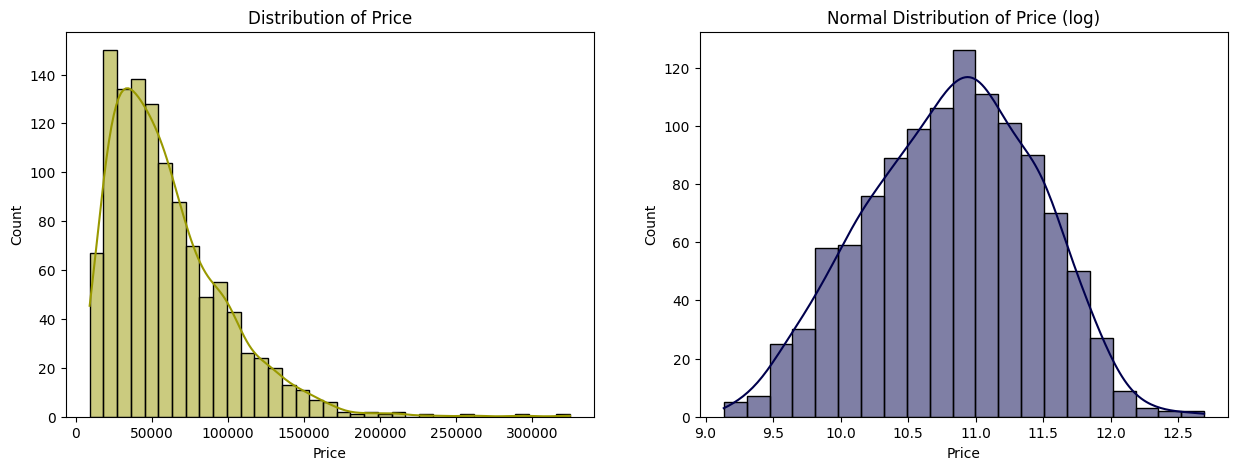

In [ ]:
# Target col Price column has some skewness which might cause problems in some algorithms to converge
#checking skewness of output column before and after applying transformation

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df_cleaned, x=df_cleaned['Price'],kde=True,color='#999900')
plt.title('Distribution of Price')

print('Skewness',round(df_cleaned['Price'].skew(),2))


plt.subplot(1,2,2)
sns.histplot(data=np.log(df_cleaned['Price']),kde=True,color='#00004d')   # applying log for price for normal distribution
plt.title('Normal Distribution of Price (log)')

plt.show()

The distribution of the target variable price is skewed and it is obvious that commodities with low prices are sold and purchased more than the branded ones.

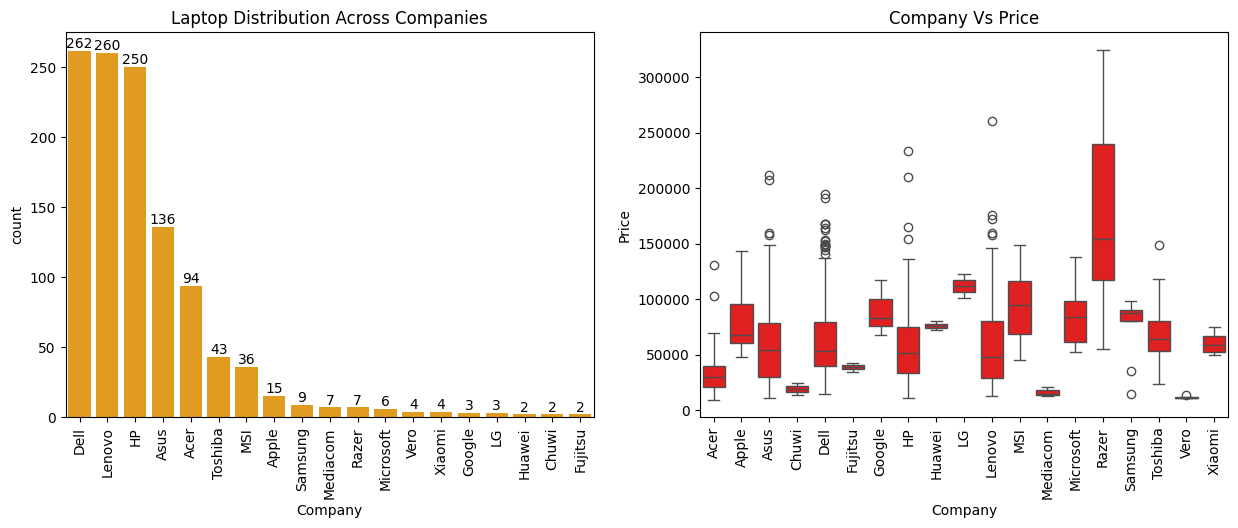

In [ ]:
# Laptop distribution across companies and Company vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='Company', color='orange', order=df_cleaned['Company'].value_counts().index)
plt.title('Laptop Distribution Across Companies')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned["Company"],y=df_cleaned["Price"], color='red')
plt.title('Company Vs Price')
plt.xticks(rotation="vertical")

plt.show()

- As per data, most purchased laptops are Dell followed by Lenovo and HP
- As per price, premium laptops are Razer, LG and MSI

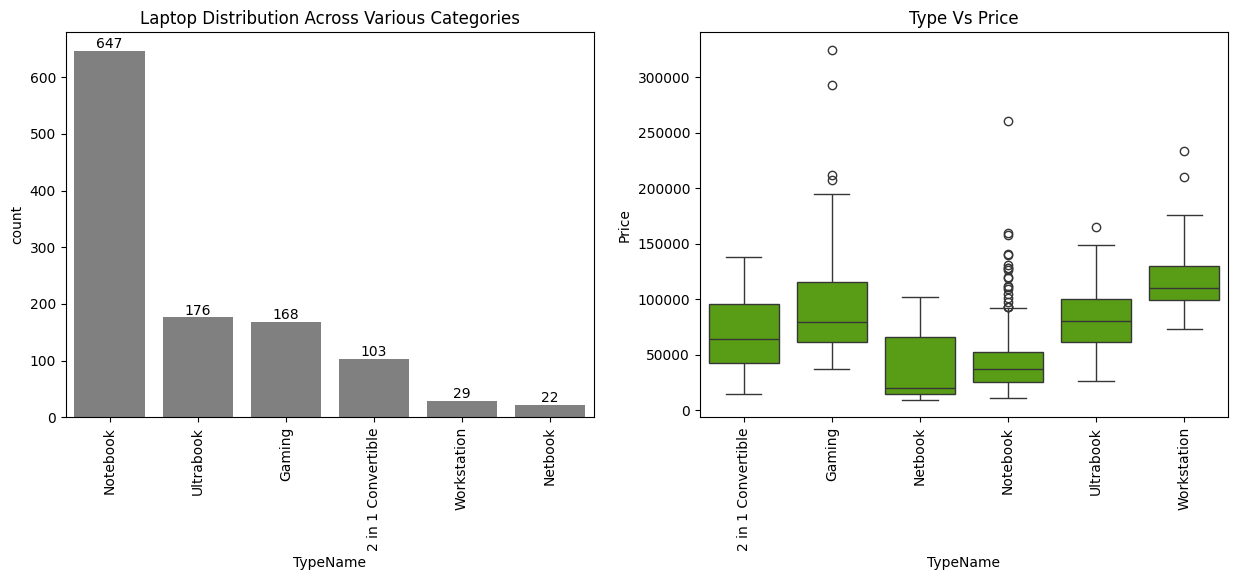

In [ ]:
# Laptop distribution across Typenames and Typenames vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='TypeName', color='grey', order=df_cleaned['TypeName'].value_counts().index)
plt.title('Laptop Distribution Across Various Categories')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned["TypeName"],y=df_cleaned["Price"], color='#59b300')
plt.title('Type Vs Price')
plt.xticks(rotation="vertical")

plt.show()

- Most purchased TypeNames are Notebook, Ultrabook and Gaming
- Also the premium ones are Workstation,Ultrabook and Gaming ( which have the most specs and configurations so tend to be more expensive)

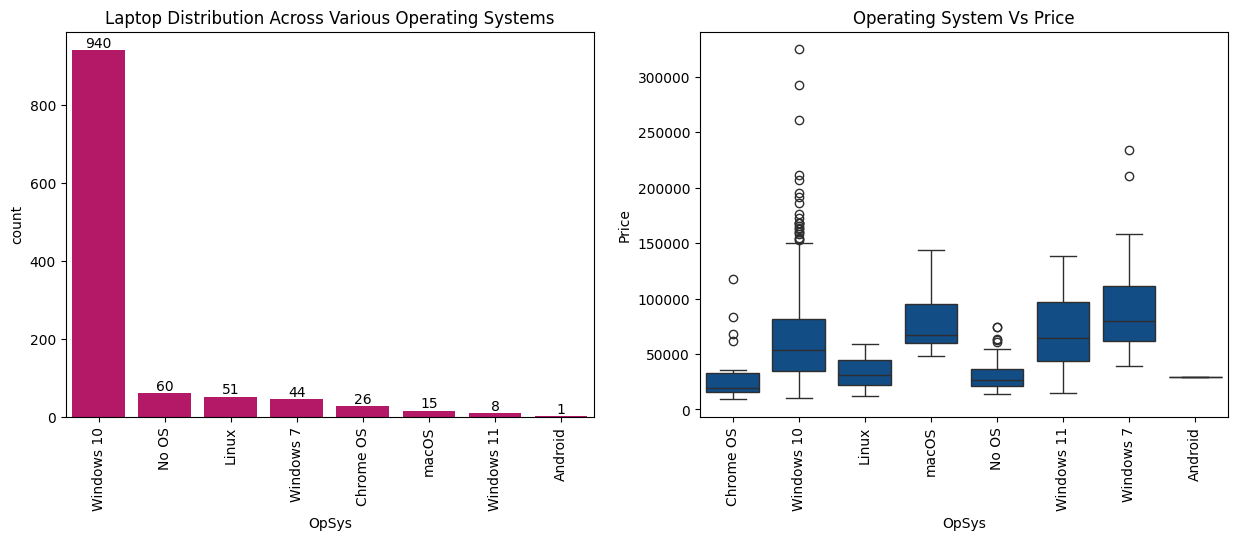

In [ ]:
# Laptop distribution across various OS and OS vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='OpSys', color='#cc0066', order= df_cleaned['OpSys'].value_counts().index)
plt.title('Laptop Distribution Across Various Operating Systems')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned["OpSys"],y=df_cleaned["Price"], color='#004d99')
plt.title('Operating System Vs Price')
plt.xticks(rotation="vertical")

plt.show()

- Most commonly purchased laptops have OS windows 10, other OS followed by Linux
- From price point, windows 7, 10 and MacOS are premium (however it is variable with the each laptops provided specs)

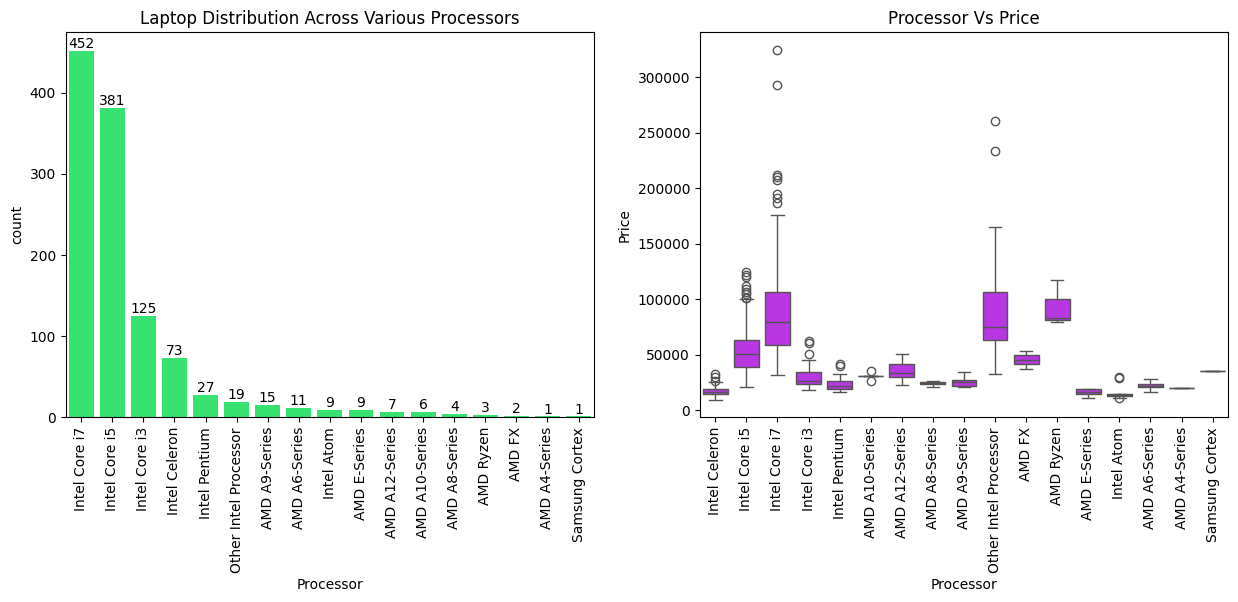

In [ ]:
# Laptop distribution across Prcessors and Processers vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='Processor', color='#1aff66', order=df_cleaned['Processor'].value_counts().index)
plt.title('Laptop Distribution Across Various Processors')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned["Processor"],y=df_cleaned["Price"], color='#c61aff')
plt.title('Processor Vs Price')
plt.xticks(rotation="vertical")

plt.show()

- Common bought laptops have processors Intel Core i7,i5,i3
- Higher price point highlight processors such as Intel Core i7, other intel processors and AMD Ryzen

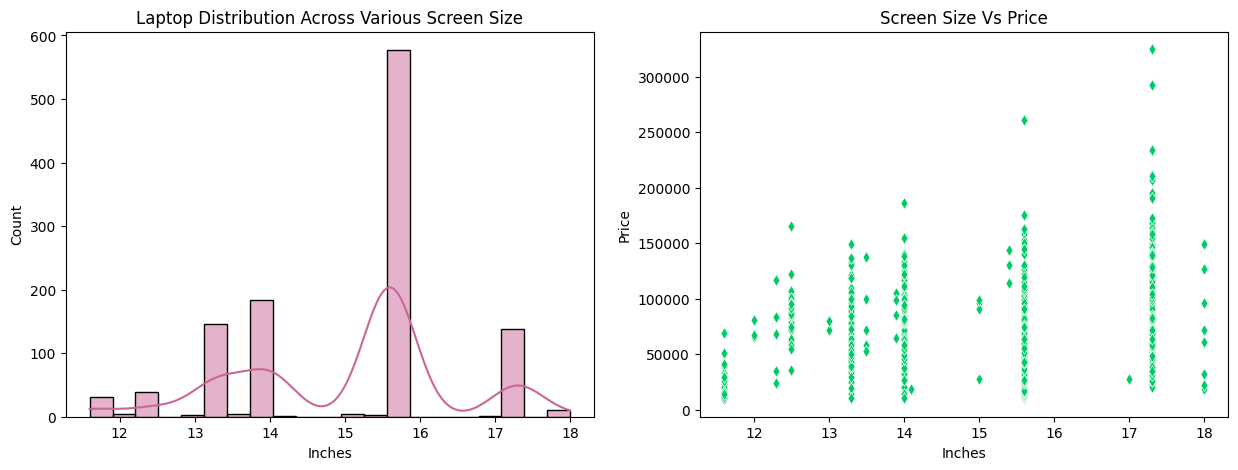

In [ ]:
# Laptop distribution across Screen size(Inches) and Screensize vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df_cleaned['Inches'],kde=True,color='#cc6699')
plt.title('Laptop Distribution Across Various Screen Size')

plt.subplot(1,2,2)
sns.scatterplot(data=df_cleaned,x="Inches",y="Price",color='#00cc66',marker='d')
plt.title('Screen Size Vs Price')

plt.show()

- Most purchased laptops have screensizes 16,14 and 13
- There is a slight correlation of price point with sizes. Higher the price point bigger the screensizes (except 18 inch being lower price point)

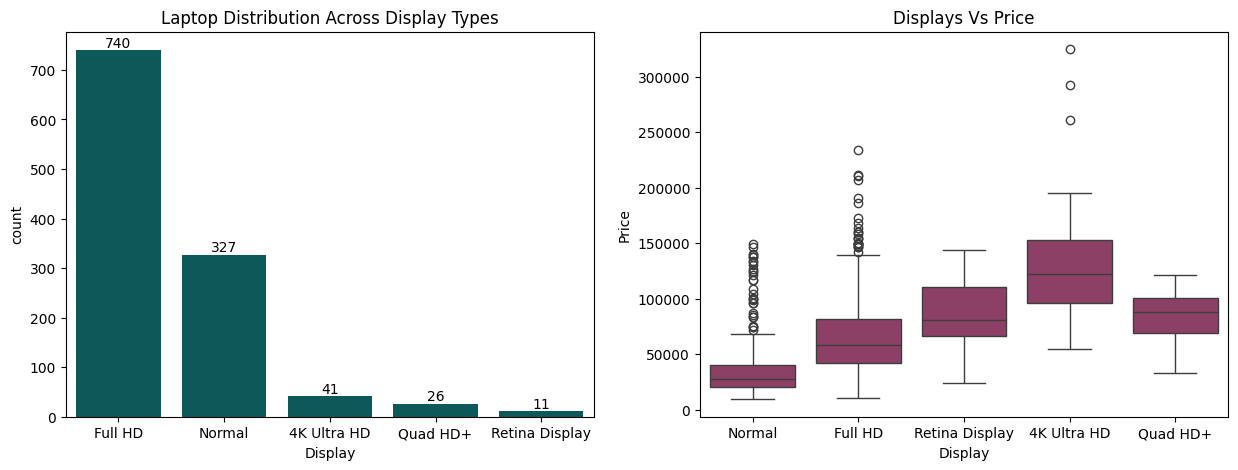

In [ ]:
# Laptop distribution across Displays and Displays vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='Display', color='#006666',order=df_cleaned['Display'].value_counts().index)
plt.title('Laptop Distribution Across Display Types')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned["Display"],y=df_cleaned["Price"], color='#993366')
plt.title('Displays Vs Price')

plt.show()


- Highly purchased laptops have Full HD, Normal and 4k Ultra HD displays
- Laptops with 4k Ultra HDRetina Display and Quad HD+ are premium ( as display quality is higher)

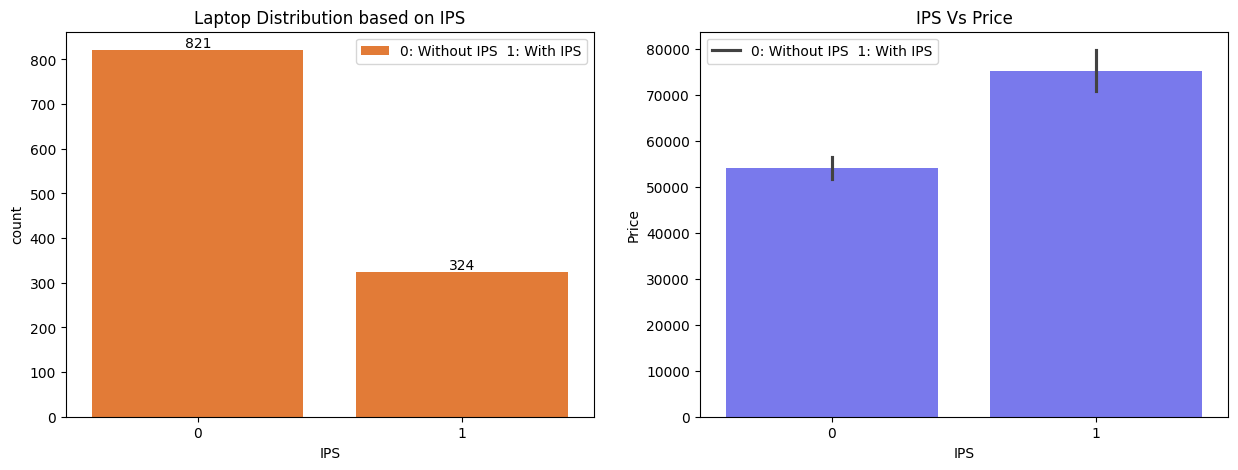

In [ ]:
# Laptop distribution across IPS and IPS vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='IPS', color='#ff751a',)
plt.title('Laptop Distribution based on IPS')
plt.legend(labels=['0: Without IPS  1: With IPS'])

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.barplot(x=df_cleaned["IPS"],y=df_cleaned["Price"], color='#6666ff')
plt.legend(labels=['0: Without IPS  1: With IPS'])
plt.title('IPS Vs Price')

plt.show()

 IPS ( In plane switching) which is a type of LCD panel technology known for producing accurate colors and wide viewing angles
- Most laptops bought have IPS tech
- Laptops with IPS tend to be on a higher price point

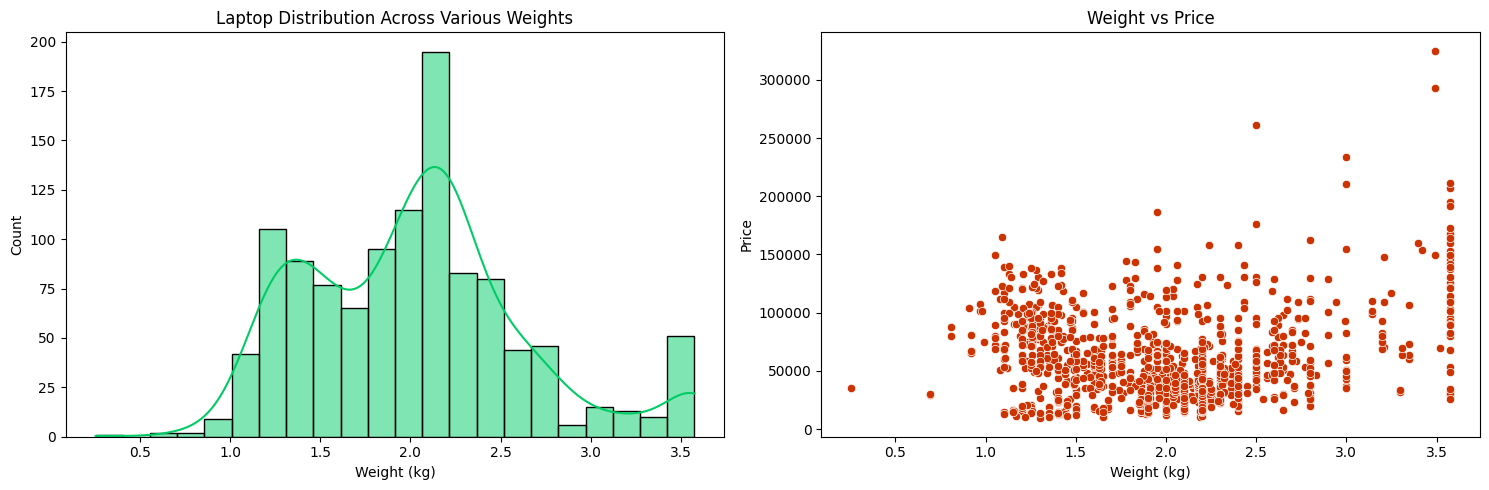

In [ ]:
# Laptop distribution across weight and weight vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df_cleaned['Weight'], kde=True, color='#00cc66')
plt.title('Laptop Distribution Across Various Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.scatterplot(data=df_cleaned, x='Weight', y='Price', color='#cc3300', marker='o')
plt.title('Weight vs Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

- There doesnt seem to be any correlation between the weight and price points
- However, most of the high specs laptops tend to be heavier in weight as seen from laptops with weight above 3.0kg  

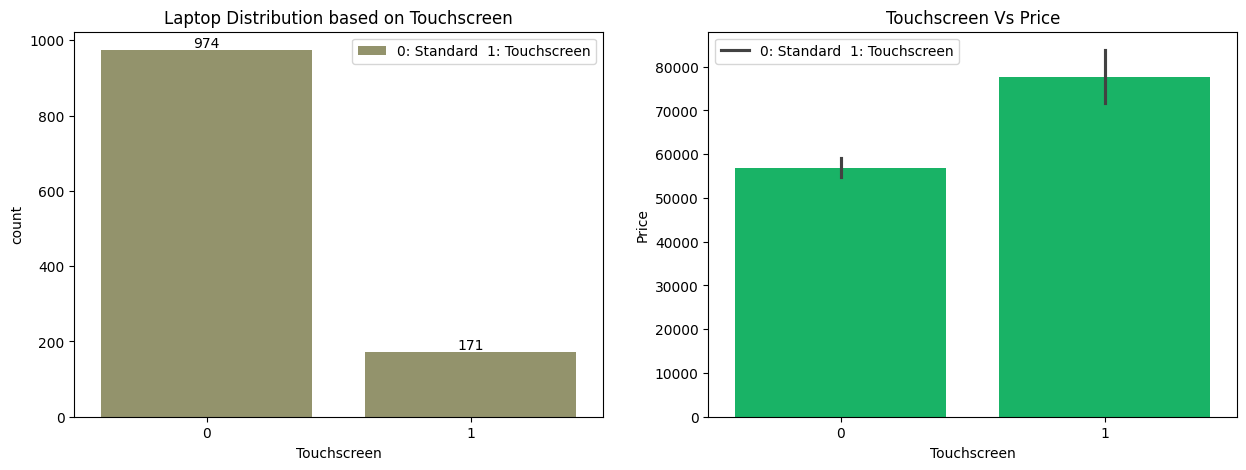

In [ ]:
# Laptop distribution across Touchscreen and Touchscreen vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='Touchscreen', color='#999966')
plt.title('Laptop Distribution based on Touchscreen')
plt.legend(labels=['0: Standard  1: Touchscreen'])

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.barplot(x=df_cleaned["Touchscreen"],y=df_cleaned["Price"], color='#00cc66')
plt.legend(labels=['0: Standard  1: Touchscreen'])
plt.title('Touchscreen Vs Price')

plt.show()

- Most laptops bought had touchscreen feature
- Laptops with  touchscreen tend to be on a higher price point

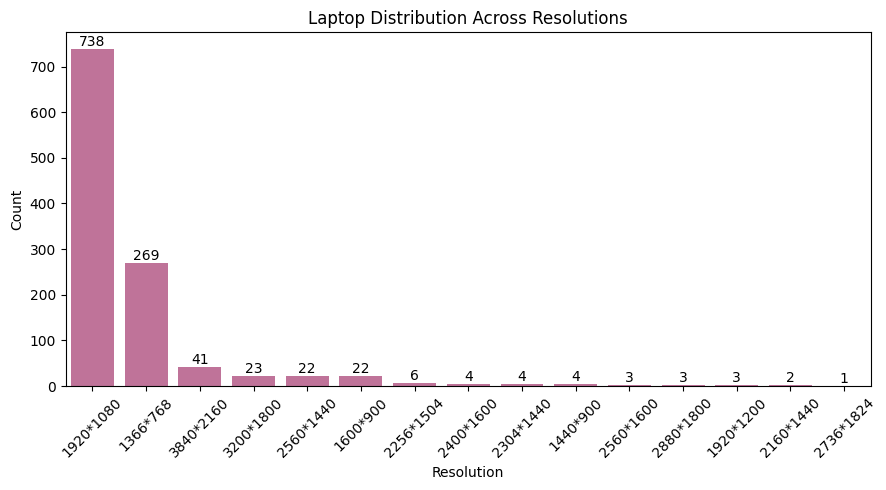

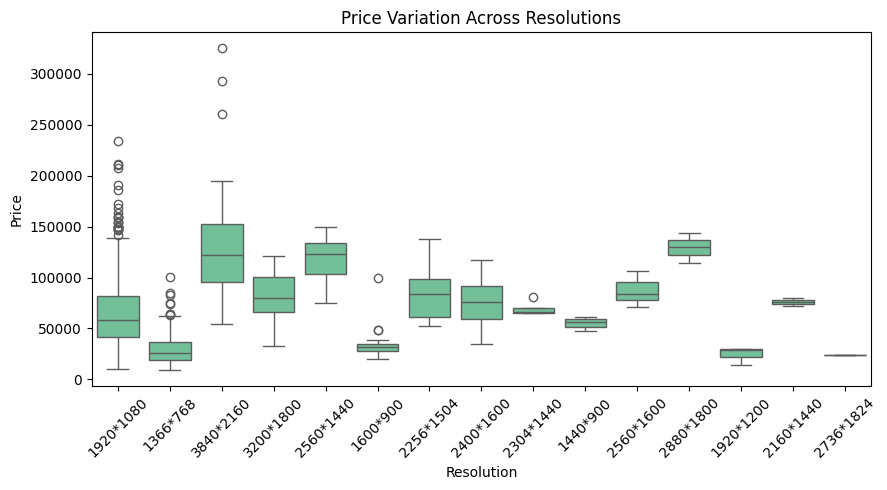

In [ ]:
# Laptop distribution across Touchscreen and Touchscreen vs Price

# 1: Create display-friendly Resolution column just for visualization
df_cleaned['Resolution'] = df_cleaned['X_res'].astype(str) + '*' + df_cleaned['Y_res'].astype(str)

# -----------------------------
# 2: Distribution across Resolutions
plt.figure(figsize=(9,5))
ax = sns.countplot(data=df_cleaned, x='Resolution', color='#cc6699', order=df_cleaned['Resolution'].value_counts().index)
plt.title('Laptop Distribution Across Resolutions')
plt.xticks(rotation=45)
plt.xlabel('Resolution')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

# -----------------------------
# 3: Price Variation Across Resolutions
plt.figure(figsize=(9,5))
sns.boxplot(data=df_cleaned, x='Resolution', y='Price', color='#66cc99', order=df_cleaned['Resolution'].value_counts().index)
plt.title('Price Variation Across Resolutions')
plt.xticks(rotation=45)
plt.xlabel('Resolution')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

- Most laptops purchased were preferred with resolutions 1920*1080, 1366*768, 3840*2160
- Laptops with higher resolutions were on the premium price point -  2880*1880, 3840*2160 , 2560*1440

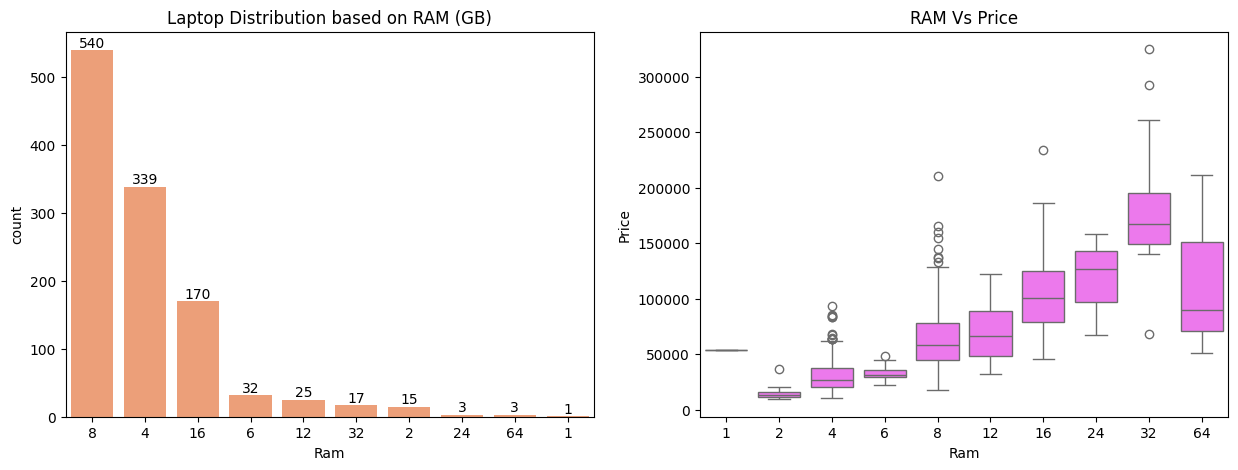

In [ ]:
# Laptop distribution across RAM and RAM vs Price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='Ram', color='#ff9966', order=df_cleaned['Ram'].value_counts().index)
plt.title('Laptop Distribution based on RAM (GB)')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned["Ram"],y=df_cleaned["Price"], color='#ff66ff')
plt.title('RAM Vs Price')

plt.show()

- RAM noticed in most purchased laptops were 8,4,16
- This is because higher RAM tends to correlate to higher price point (some variability noticed with 64GB RAM)

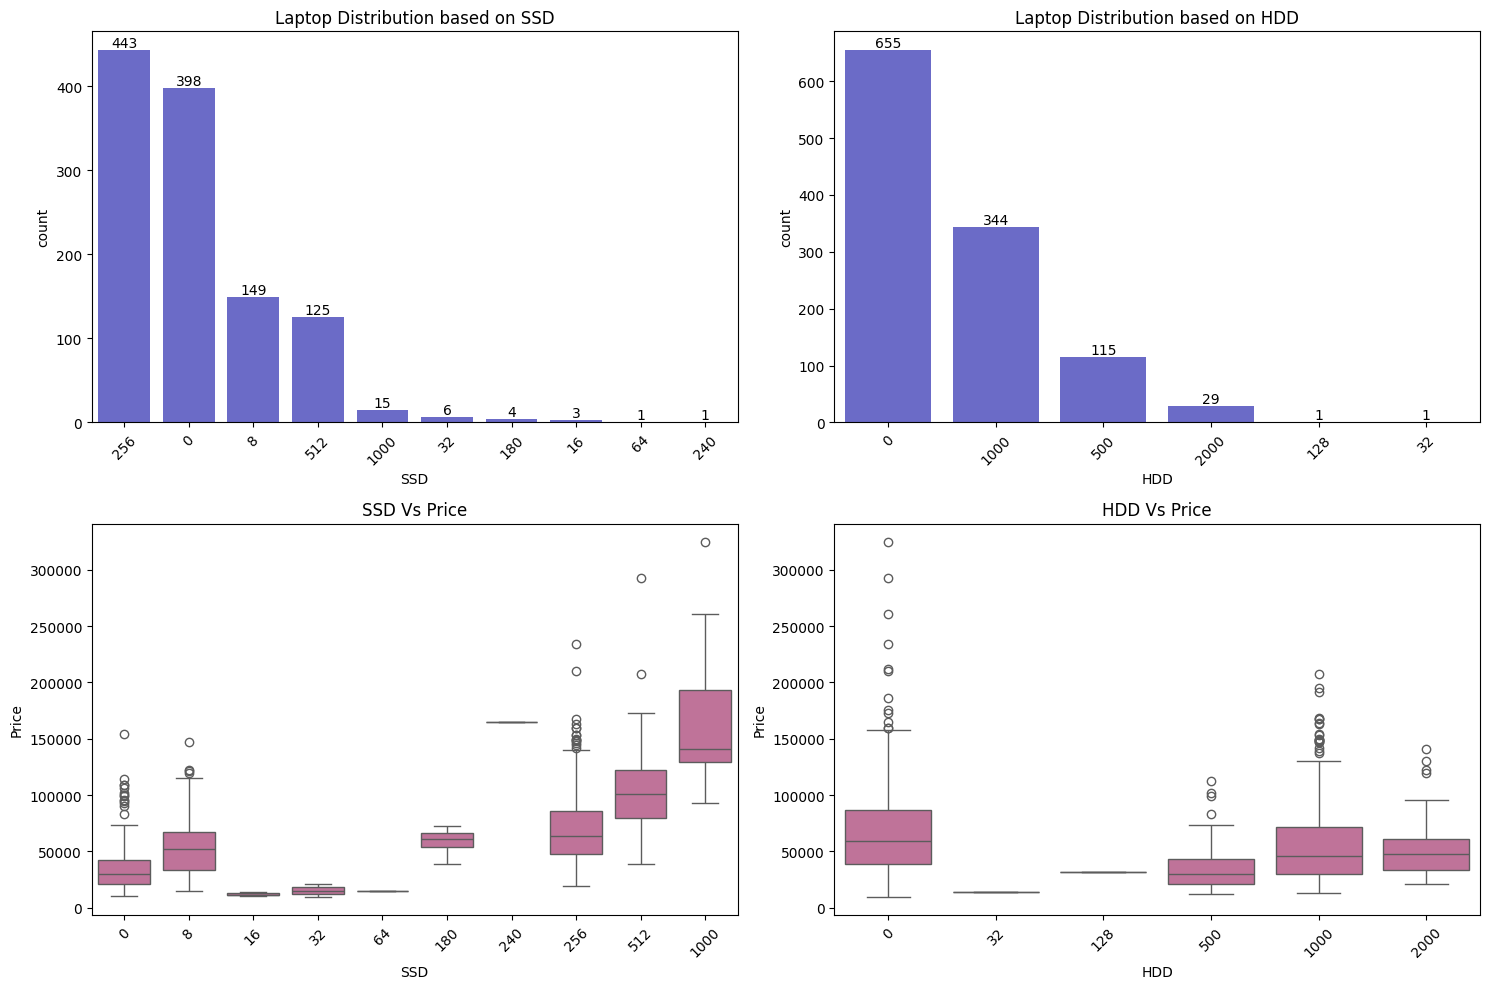

In [ ]:
# Laptop distribution across SSD,HDD and # Price vs SSD,HDD
plt.figure(figsize=(15,10))

# SSD distribution
plt.subplot(2,2,1)
ax = sns.countplot(data=df_cleaned, x='SSD', color='#5c5cd6', order=df_cleaned['SSD'].value_counts().index)
plt.title('Laptop Distribution based on SSD')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
# -----------------------------

# HDD distribution
plt.subplot(2,2,2)
ax = sns.countplot(data=df_cleaned, x='HDD', color='#5c5cd6', order=df_cleaned['HDD'].value_counts().index)
plt.title('Laptop Distribution based on HDD')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
# -----------------------------

# SSD vs Price
plt.subplot(2,2,3)
sns.boxplot(x='SSD', y='Price', data=df_cleaned, color='#cc6699')
plt.title('SSD Vs Price')
plt.xticks(rotation=45)
# -----------------------------

# HDD vs Price
plt.subplot(2,2,4)
sns.boxplot(x='HDD', y='Price', data=df_cleaned, color='#cc6699')
plt.title('HDD Vs Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

SSD
- Most purchased laptops have SSD 256, 0 , 8
- SSD correlates to price point so higher price point --> SSDs 1000,512,256

HDD
- Most purchased laptops have HDD 0,1000,500
- HDD doesnt correlated to price point --> so higher price point HDDs are 0 (very variable), 1000 and 2000 - most seem to be around same price point give or take

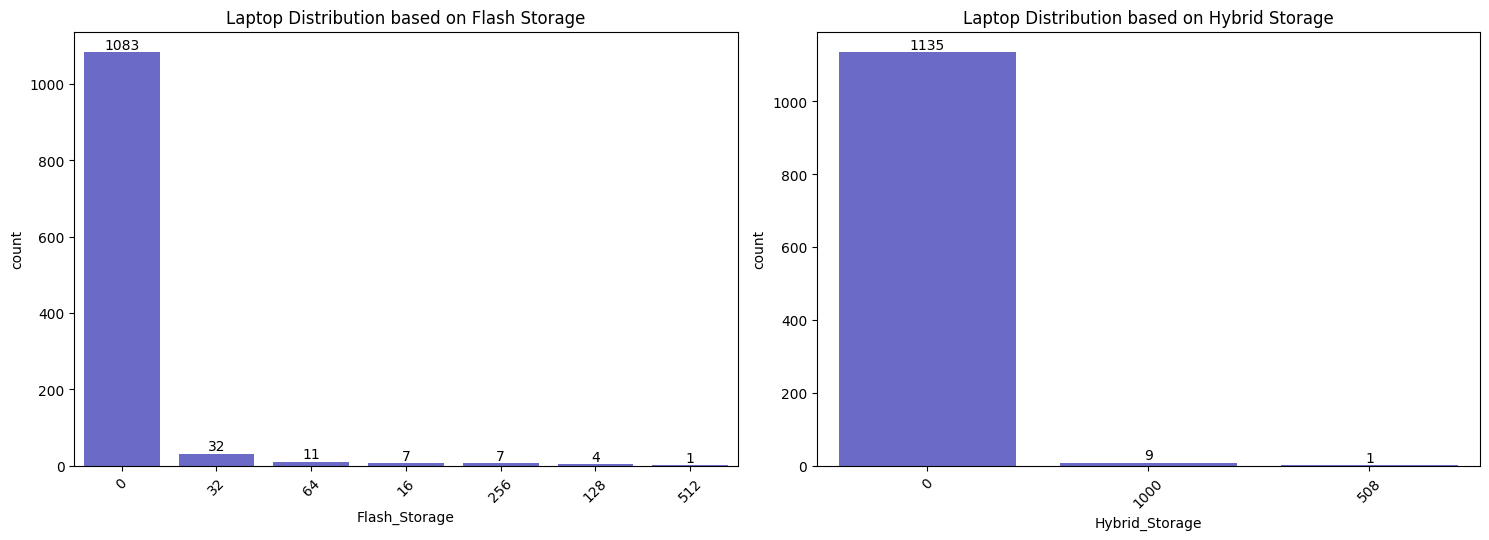

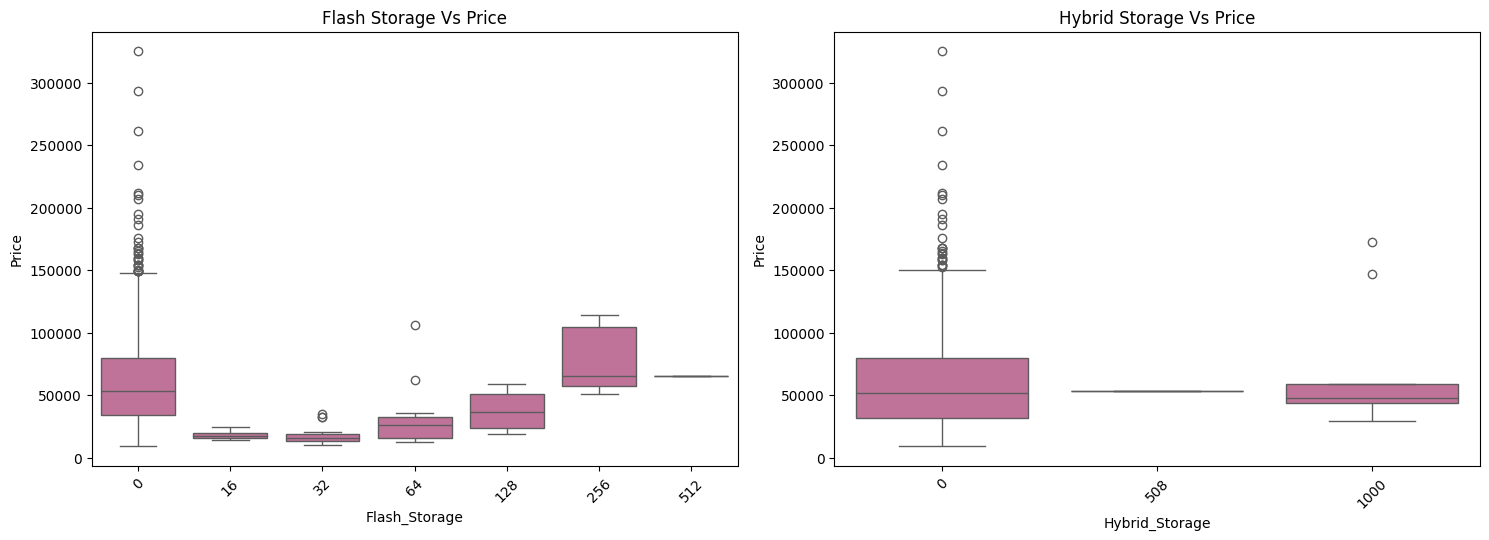

In [ ]:
# Laptop distribution across Flash storage and Hybrid and Price vs Flash storage and Hybrid

plt.figure(figsize=(15,10))

# Flash Storage distribution
plt.subplot(2,2,1)
ax = sns.countplot(
    data=df_cleaned,
    x='Flash_Storage',
    color='#5c5cd6',
    order=df_cleaned['Flash_Storage'].value_counts().index
)
plt.title('Laptop Distribution based on Flash Storage')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)

# Hybrid Storage distribution
plt.subplot(2,2,2)
ax = sns.countplot(
    data=df_cleaned,
    x='Hybrid_Storage',
    color='#5c5cd6',
    order=df_cleaned['Hybrid_Storage'].value_counts().index
)
plt.title('Laptop Distribution based on Hybrid Storage')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

# -----------------------------
# Flash and Hybrid Storage vs Price
plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
sns.boxplot(x='Flash_Storage', y='Price', data=df_cleaned, color='#cc6699')
plt.title('Flash Storage Vs Price')
plt.xticks(rotation=45)


plt.subplot(2,2,2)
sns.boxplot(x='Hybrid_Storage', y='Price', data=df_cleaned, color='#cc6699')
plt.title('Hybrid Storage Vs Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Flash Storage
- Most purchased laptops have FS 0,32,64
- FS doesnt correlate to price point --> 0(very variable),256, 512

Hybrid storage
- Most purchased laptops have HS have other types of HS, followed by 1.0TB and 508GB
- HS with price point- while median is around same price point there are variabilities with other types of HS

   - others -0
   - 508 -'508GB Hybrid'
   - q1000- -'1.0TB Hybrid'

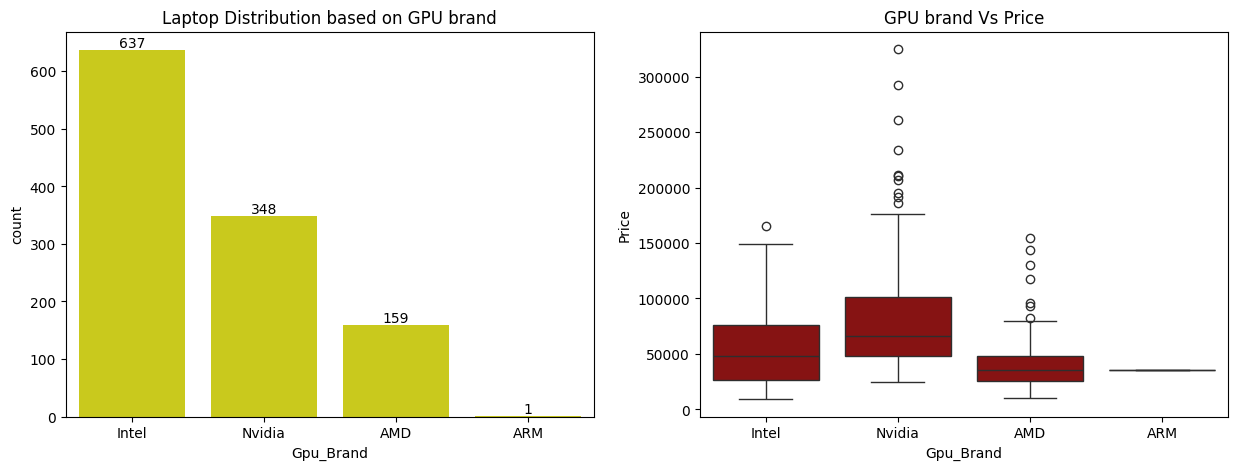

In [ ]:
# Laptop distribution across GPU brand and Price vs GPU brand
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df_cleaned, x='Gpu_Brand',color='#e6e600', order= df_cleaned['Gpu_Brand'].value_counts().index)
plt.title('Laptop Distribution based on GPU brand')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.boxplot(x=df_cleaned['Gpu_Brand'],y=df_cleaned['Price'],color='#990000')
plt.title('GPU brand Vs Price')

plt.show()

- Mostly bought laptops have brand Intel followed by Nvidia and AMD
- Nvidia is higher on premium side followed by Intel - this also accounts to the higher specs and GPU

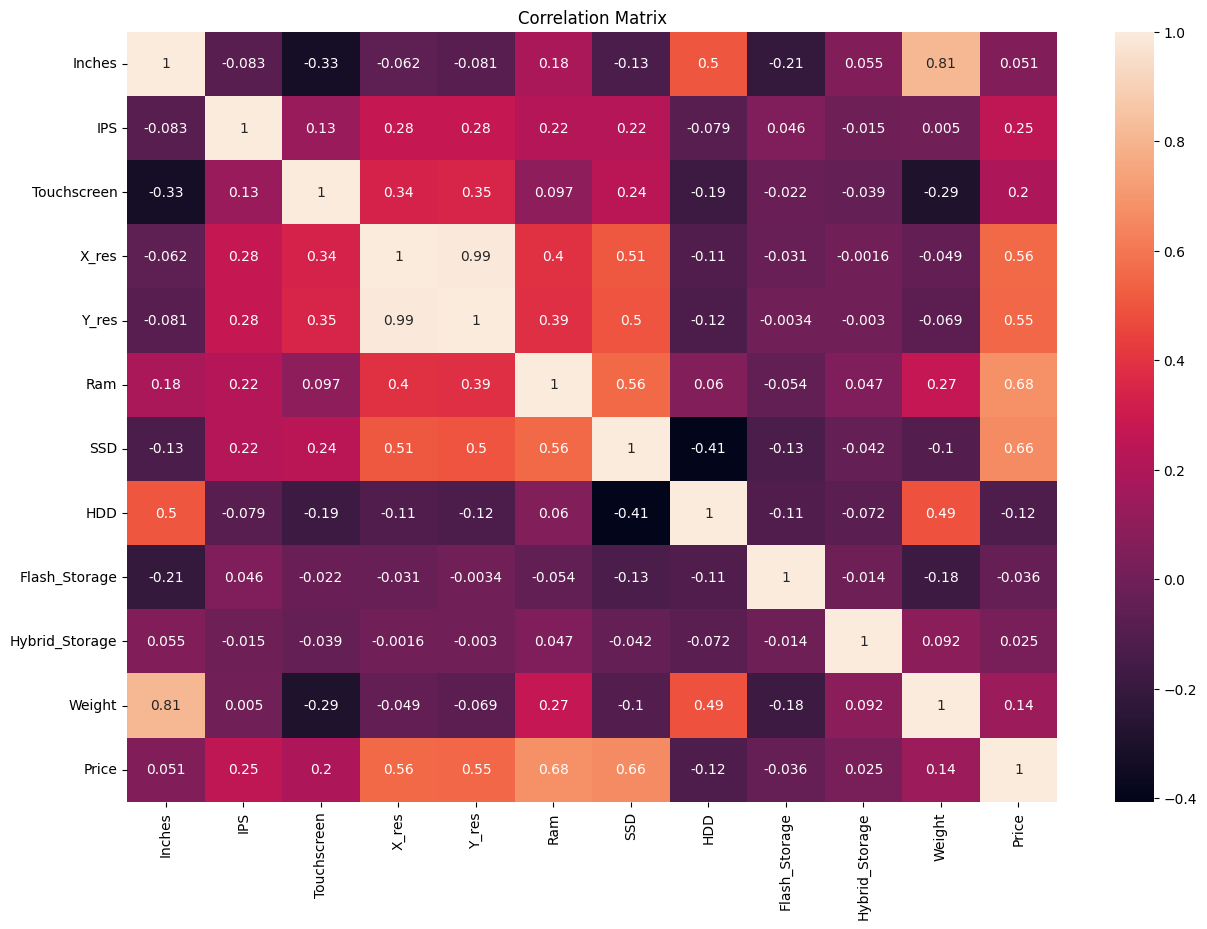

In [ ]:
# Correlation matrix to find which features correlate the most and least with the target variable  +1 high, -1 low, 0- No corr
plt.figure(figsize=(15,10))
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_cleaned.corr(numeric_only=True)['Price']

,Price
Inches,0.050780
IPS,0.253270
Touchscreen,0.195376
X_res,0.557150
Y_res,0.553757
Ram,0.677734
SSD,0.662186
HDD,-0.115373
Flash_Storage,-0.035564
Hybrid_Storage,0.024684


From the numeric columns,
- highly correlated: RAM, SSD and Screen resolution(X and Y res)
- Least correlated - HDD and Flash storage

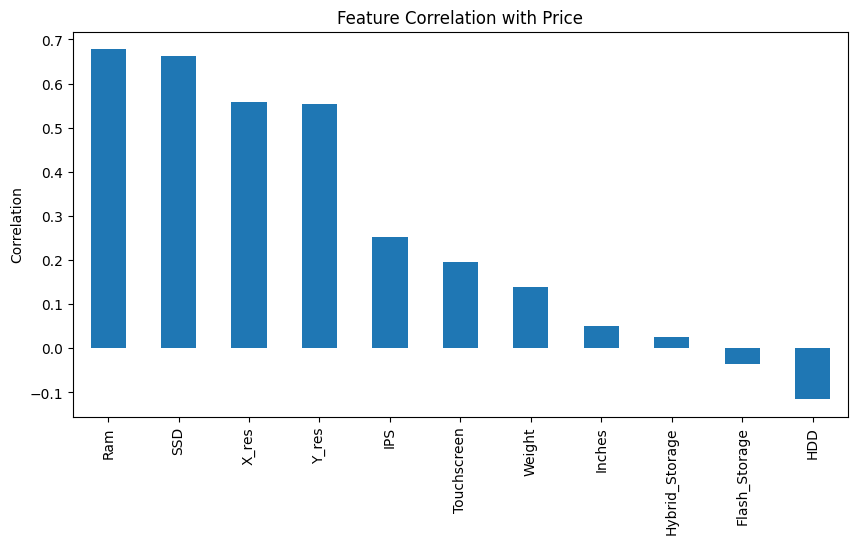

In [ ]:
# Compute correlation of numeric features with Price
feature_corr = df_cleaned.corr(numeric_only=True)['Price'].drop('Price')  # drop self-correlation

# Plot as column chart
feature_corr.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Correlation with Price')
plt.ylabel('Correlation')
plt.show()

## Feature Selection

In [ ]:
#we are going to use only postively correleted column
df_cleaned.corr(numeric_only=True)['Price']

,Price
Inches,0.050780
IPS,0.253270
Touchscreen,0.195376
X_res,0.557150
Y_res,0.553757
Ram,0.677734
SSD,0.662186
HDD,-0.115373
Flash_Storage,-0.035564
Hybrid_Storage,0.024684


In [ ]:
df_cleaned.drop(columns=['HDD','Flash_Storage'],inplace=True)

In [ ]:
# dropping resolution before adding to the model
df_cleaned.drop(columns=['Resolution'],inplace=True)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1145 non-null   object 
 1   TypeName        1145 non-null   object 
 2   OpSys           1145 non-null   object 
 3   Processor       1145 non-null   object 
 4   Inches          1145 non-null   float64
 5   Display         1145 non-null   object 
 6   IPS             1145 non-null   int64  
 7   Touchscreen     1145 non-null   int64  
 8   X_res           1145 non-null   int64  
 9   Y_res           1145 non-null   int64  
 10  Ram             1145 non-null   int64  
 11  SSD             1145 non-null   int64  
 12  Hybrid_Storage  1145 non-null   int64  
 13  Gpu_Brand       1145 non-null   object 
 14  Weight          1145 non-null   float64
 15  Price           1145 non-null   float64
dtypes: float64(3), int64(7), object(6)
memory usage: 143.3+ KB


### saving the cleaned dataset - cleaned_laptop_data1.csv

In [ ]:
# saving the cleaned data for using it later
df_cleaned.to_csv('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/cleaned_laptop_data1.csv', index=False)

In [ ]:
# Pickle format preserves the data types and structure better than CSV so saving it
import joblib
from google.colab import drive
drive.mount('/content/drive')

joblib.dump(df_cleaned, '/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/cleaned_laptop_data.pkl')

#df = joblib.load('cleaned_laptop_data.pkl') to load

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/cleaned_laptop_data.pkl']

## Preparing Input Features and Target Variable

In [ ]:
# load the dataset

import joblib
from google.colab import drive
drive.mount('/content/drive')
df_cleaned = joblib.load('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/cleaned_laptop_data.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#extracting X and y
X=df_cleaned.drop(columns=['Price'])
y=np.log(df_cleaned['Price'])  # log normalizes skewed prices, stabilize variance as seen in EDA

In [ ]:
X.head()

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,Hybrid_Storage,Gpu_Brand,Weight
0,Acer,2 in 1 Convertible,Chrome OS,Intel Celeron,11.6,Normal,1,1,1366,768,4,0,0,Intel,1.25
1,Acer,2 in 1 Convertible,Windows 10,Intel Celeron,11.6,Full HD,1,1,1920,1080,4,0,0,Intel,1.25
2,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,1,256,0,Intel,1.60
3,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,8,256,0,Intel,1.50
4,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,8,256,0,Intel,1.60


In [ ]:
y.head()

,Price
0,9.926204
1,9.830633
2,10.882316
3,10.717262
4,10.510802


In [ ]:
print(f'X columns: {X.columns}')

X columns: Index(['Company', 'TypeName', 'OpSys', 'Processor', 'Inches', 'Display', 'IPS',
       'Touchscreen', 'X_res', 'Y_res', 'Ram', 'SSD', 'Hybrid_Storage',
       'Gpu_Brand', 'Weight'],
      dtype='object')


In [ ]:
#creating X_train,X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
X_train.shape, y_train.shape

((916, 15), (916,))

In [ ]:
X_test.shape, y_test.shape

((229, 15), (229,))

## Model development

In [ ]:
#importing required sci-kit learn classes and evaluation metrics
#note: we are performing feature engineering techniques while training the model by using pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#importng regresson algorithims
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

A Pipeline in scikit-learn is a workflow object that lets you connect multiple steps — such as preprocessing and modeling — into a single unified process.

(Pipeline in scikit-learn chains multiple steps together)

- 'step_1' → your ColumnTransformer (handles encoding + scaling) - preprocessing common to all 3 models

- 'step_2' → your model

In [ ]:
numeric_cols = ['Inches','X_res','Y_res','Ram','SSD','Hybrid_Storage','Weight']
categorical_cols = ['Company','TypeName','OpSys','Processor','Display','IPS','Touchscreen','Gpu_Brand']

In [ ]:
# preprocessing step common to all
step_1 = ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols),
    ('Col_tnf2', StandardScaler(), numeric_cols)
], remainder='passthrough')

In [ ]:
# created a df to store all the results
model_results_df = pd.DataFrame(columns=['Model', 'R2_log', 'MAE_log', 'RMSE_log', 'R2_Actual', 'MAE_Actual', 'RMSE_Actual'])

### Linear regression

In [ ]:
# appling feature engineering techniques like scaling and encoding using column transformer
# step 1

step_2= LinearRegression()

pipe= Pipeline([
    ('step_1',step_1),  # preprocessing
    ('step_2',step_2)   # model
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

# ------------------------------------------
# Metrics on log scale
r2_log = r2_score(y_test, y_pred)
mae_log = mean_absolute_error(y_test, y_pred)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))

# Reverse the log transform and compute on actual scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Recalculate metrics on actual prices
r2 = r2_score(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("Results of Linear Regression model: ")
print(f"{'Metric':<20}{'Log Scale':<15}{'Actual Scale':<15}")
print(f"{'R2 Score':<20}{r2_log:<15.3f}{r2:<15.3f}")
print(f"{'MAE':<20}{mae_log:<15.3f}₹{mae:,.0f}")
print(f"{'RMSE':<20}{rmse_log:<15.3f}₹{rmse:,.0f}")

# R² → How well the model explains the variation in prices (closer to 1 = better).
# MAE → Average absolute difference between actual and predicted prices (in original units).
# RMSE → Square root of average squared errors (penalizes large errors more).

Results of Linear Regression model: 
Metric              Log Scale      Actual Scale   
R2 Score            0.853          0.727          
MAE                 0.184          ₹11,239
RMSE                0.231          ₹17,083


In [ ]:
# Add results to dataframe
model_results_df.loc[len(model_results_df)] = ['Linear Regression', r2_log, mae_log,rmse_log, r2, mae,rmse]

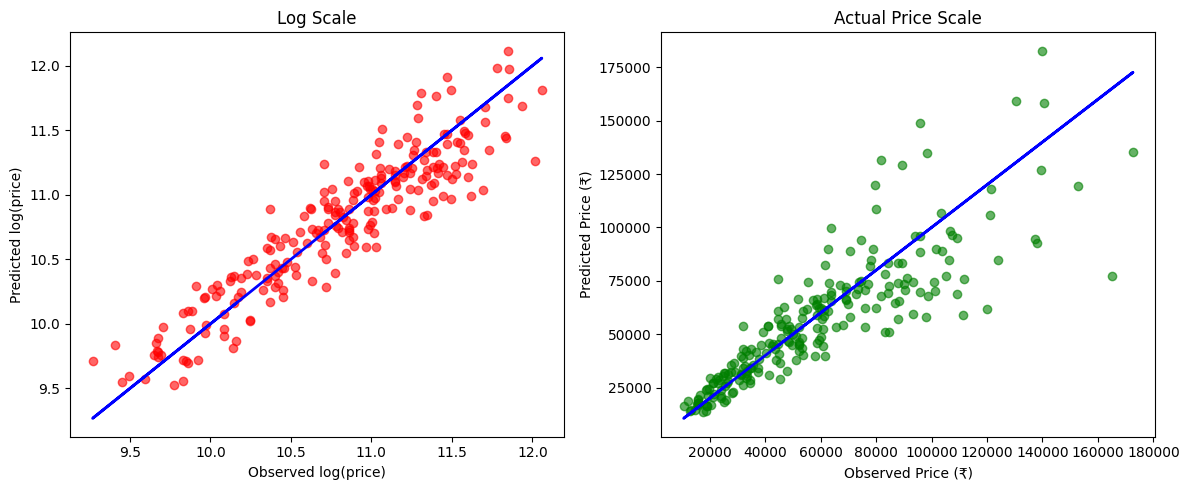

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Log scale plot ---
axes[0].scatter(y_test, y_pred, color='red', alpha=0.6)
axes[0].plot(y_test, y_test, color='blue', linewidth=2)
axes[0].set_title('Log Scale')
axes[0].set_xlabel('Observed log(price)')
axes[0].set_ylabel('Predicted log(price)')

# --- Actual scale plot ---
axes[1].scatter(y_test_actual, y_pred_actual, color='green', alpha=0.6)
axes[1].plot(y_test_actual, y_test_actual, color='blue', linewidth=2)
axes[1].set_title('Actual Price Scale')
axes[1].set_xlabel('Observed Price (₹)')
axes[1].set_ylabel('Predicted Price (₹)')

plt.tight_layout()
plt.show()

In [ ]:
pipe

Pipeline(steps=[('step_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Col_tnf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Processor',
                                                   'Display', 'IPS',
                                                   'Touchscreen',
                                                   'Gpu_Brand']),
                                                 ('Col_tnf2', StandardScaler(),
                                                  ['Inches', 'X_res', 'Y_res',
                                                   'Ram', 'SSD',
                                                   'Hybrid_Storage',
                                                   'Weight'])])),
                ('step_2', LinearRegression())])

### Random Forest Regressor

In [ ]:
# step_1

step_2=  RandomForestRegressor(n_estimators=1000,
                              random_state=5,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=25)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

# ------------------------------------------
# Metrics on log scale
r2_log = r2_score(y_test, y_pred)
mae_log = mean_absolute_error(y_test, y_pred)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))

# Reverse the log transform and compute on actual scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Recalculate metrics on actual prices
r2 = r2_score(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("Results of Random Forest Regressor model: ")
print(f"{'Metric':<20}{'Log Scale':<15}{'Actual Scale':<15}")
print(f"{'R2 Score':<20}{r2_log:<15.3f}{r2:<15.3f}")
print(f"{'MAE':<20}{mae_log:<15.3f}₹{mae:,.0f}")
print(f"{'RMSE':<20}{rmse_log:<15.3f}₹{rmse:,.0f}")

Results of Random Forest Regressor model: 
Metric              Log Scale      Actual Scale   
R2 Score            0.876          0.784          
MAE                 0.163          ₹9,952
RMSE                0.212          ₹15,211


In [ ]:
# Add results to dataframe
model_results_df.loc[len(model_results_df)] = ['Random Forest Regressor', r2_log, mae_log,rmse_log , r2, mae,rmse]

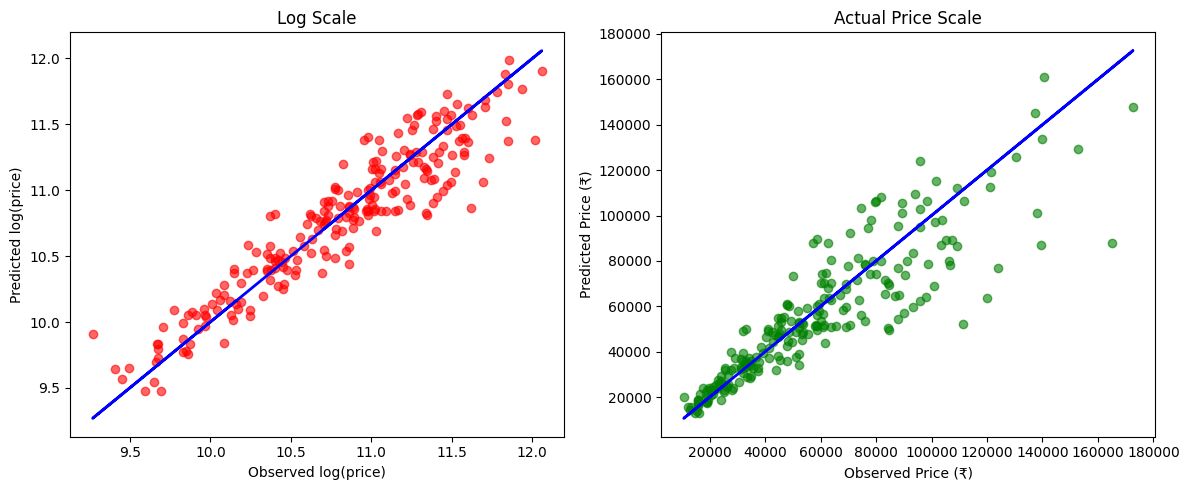

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Log scale plot ---
axes[0].scatter(y_test, y_pred, color='red', alpha=0.6)
axes[0].plot(y_test, y_test, color='blue', linewidth=2)
axes[0].set_title('Log Scale')
axes[0].set_xlabel('Observed log(price)')
axes[0].set_ylabel('Predicted log(price)')

# --- Actual scale plot ---
axes[1].scatter(y_test_actual, y_pred_actual, color='green', alpha=0.6)
axes[1].plot(y_test_actual, y_test_actual, color='blue', linewidth=2)
axes[1].set_title('Actual Price Scale')
axes[1].set_xlabel('Observed Price (₹)')
axes[1].set_ylabel('Predicted Price (₹)')

plt.tight_layout()
plt.show()

In [ ]:
pipe

Pipeline(steps=[('step_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Col_tnf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Processor',
                                                   'Display', 'IPS',
                                                   'Touchscreen',
                                                   'Gpu_Brand']),
                                                 ('Col_tnf2', StandardScaler(),
                                                  ['Inches', 'X_res', 'Y_res',
                                                   'Ram', 'SSD',
                                                   'Hybrid_Storage',
                                                   'Weight'])])),
                ('step_2',
                 RandomForestRegressor(max_depth=25, max_features=0.75,
                                       n_estimators=1000, random_state=5))])

### Gradient Boost

In [ ]:
# step_1

step_2=  GradientBoostingRegressor(n_estimators=1000,max_features=0.9)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
# ------------------------------------------
# Metrics on log scale
r2_log = r2_score(y_test, y_pred)
mae_log = mean_absolute_error(y_test, y_pred)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))

# Reverse the log transform and compute on actual scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Recalculate metrics on actual prices
r2 = r2_score(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("Results of Gradient Boost Regressor model: ")
print(f"{'Metric':<20}{'Log Scale':<15}{'Actual Scale':<15}")
print(f"{'R2 Score':<20}{r2_log:<15.3f}{r2:<15.3f}")
print(f"{'MAE':<20}{mae_log:<15.3f}₹{mae:,.0f}")
print(f"{'RMSE':<20}{rmse_log:<15.3f}₹{rmse:,.0f}")

Results of Gradient Boost Regressor model: 
Metric              Log Scale      Actual Scale   
R2 Score            0.895          0.799          
MAE                 0.151          ₹9,452
RMSE                0.195          ₹14,688


In [ ]:
# Add results to dataframe
model_results_df.loc[len(model_results_df)] = ['Gradient Boost Regressor', r2_log, mae_log,rmse_log, r2, mae,rmse]

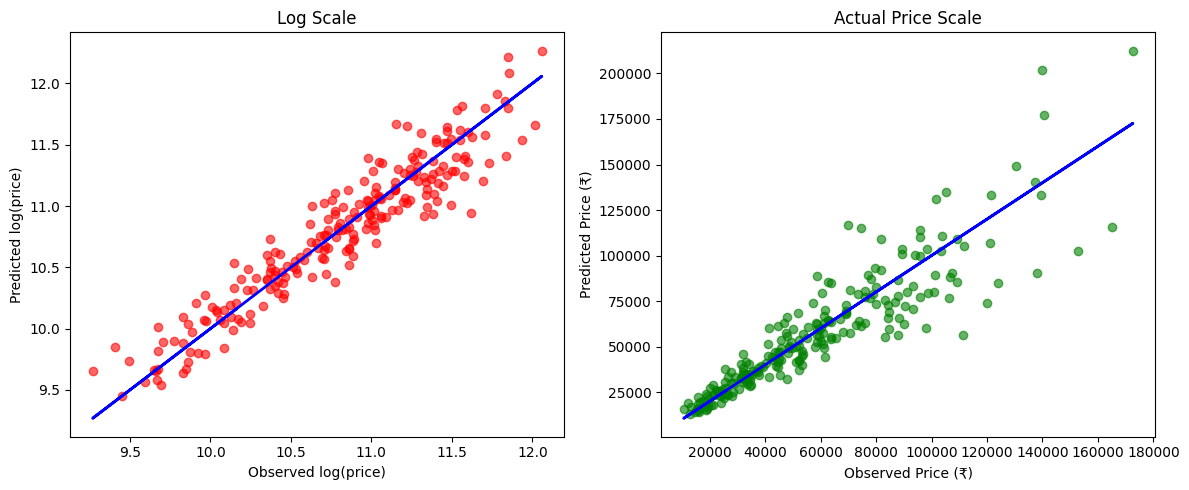

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Log scale plot ---
axes[0].scatter(y_test, y_pred, color='red', alpha=0.6)
axes[0].plot(y_test, y_test, color='blue', linewidth=2)
axes[0].set_title('Log Scale')
axes[0].set_xlabel('Observed log(price)')
axes[0].set_ylabel('Predicted log(price)')

# --- Actual scale plot ---
axes[1].scatter(y_test_actual, y_pred_actual, color='green', alpha=0.6)
axes[1].plot(y_test_actual, y_test_actual, color='blue', linewidth=2)
axes[1].set_title('Actual Price Scale')
axes[1].set_xlabel('Observed Price (₹)')
axes[1].set_ylabel('Predicted Price (₹)')

plt.tight_layout()
plt.show()

In [ ]:
pipe

Pipeline(steps=[('step_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Col_tnf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName',
                                                   'OpSys', 'Processor',
                                                   'Display', 'IPS',
                                                   'Touchscreen',
                                                   'Gpu_Brand']),
                                                 ('Col_tnf2', StandardScaler(),
                                                  ['Inches', 'X_res', 'Y_res',
                                                   'Ram', 'SSD',
                                                   'Hybrid_Storage',
                                                   'Weight'])])),
                ('step_2',
                 GradientBoostingRegressor(max_features=0.9,
                                           n_estimators=1000))])

In [ ]:
model_results_df

,Model,R2_log,MAE_log,RMSE_log,R2_Actual,MAE_Actual,RMSE_Actual
0,Linear Regression,0.852500,0.183779,0.231432,0.727466,11238.582591,17083.021794
1,Random Forest Regressor,0.875827,0.163167,0.212345,0.783916,9952.402942,15211.300318
2,Gradient Boost Regressor,0.895261,0.151192,0.195022,0.798517,9452.124601,14688.369669


In [ ]:
joblib.dump(pipe, '/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/gb_model.pkl')
# saving untuned model

['/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/gb_model.pkl']

## Hyper parameter tuning for best model - Gradient boost

Choosing Model
 - Out of all the models: Gradient Boost is the best one
 - R2_score: 0.895261 or **89%**

In [ ]:
# to load the pickle
pipe = joblib.load('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/gb_model.pkl')   # to use for further prediction

In [ ]:
# Step 1: Define hyperparameter grid/distribution
from scipy.stats import randint, uniform

param_dist = {
    'step_2__n_estimators': np.arange(500, 1500),         # number of trees
    'step_2__learning_rate': np.linspace(0.01, 0.1, 10),      # smaller rates for stability
    'step_2__max_depth': np.arange(3, 9),                      # shallow trees prevent overfitting
    'step_2__min_samples_split': np.arange(4, 11),             # minimum samples to split a node
    'step_2__min_samples_leaf': np.arange(1, 6),               # minimum samples at leaf node
    'step_2__max_features': np.linspace(0.6, 1.0, 5)           # fraction of features to consider
}

# Notice the step_2__ prefix — this is because your regressor is inside the pipeline (step_2).

In [ ]:
# Step 2: Use RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=50,                 # number of random combinations to try
    cv=10,                      # 5-fold CV
    scoring='r2',              # R² on log(y)
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Col_tnf1',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Company',
                                                                                'TypeName',
                                                                                'OpSys',
                                                                                'Processor',
                                                                                'Display',
                                                                                'IPS',
                                                                                'Touchscreen',
                                                                                'Gpu_Brand']),
                                                                              ('Col_tnf2',
                                                                               StandardScaler(),
                                                                               ['Inches',
                                                                                'X_res',
                                                                                'Y_res',
                                                                                'Ram',
                                                                                'S...
       1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445,
       1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456,
       1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467,
       1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478,
       1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489,
       1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499])},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
# Step 3: Check best hyperparameters on log scale target values
print("Best hyperparameters:", random_search.best_params_)
print("Best CV R² score:", random_search.best_score_)

Best hyperparameters: {'step_2__n_estimators': np.int64(1269), 'step_2__min_samples_split': np.int64(9), 'step_2__min_samples_leaf': np.int64(3), 'step_2__max_features': np.float64(0.6), 'step_2__max_depth': np.int64(4), 'step_2__learning_rate': np.float64(0.04000000000000001)}
Best CV R² score: 0.8942525696474373


RandomizedSearchCV tried 50 different combinations of hyperparameters using 5-fold CV, and this combination gave the highest mean CV R² (≈0.8942525696474373)

In [ ]:
# Step 4: Update pipeline with tuned model

# best_estimator_ already has the pipeline + best params
gb_tuned = random_search.best_estimator_

# Predict on test data
y_pred = gb_tuned.predict(X_test)

# ------------------------------------------
# Metrics on log scale
r2_log = r2_score(y_test, y_pred)
mae_log = mean_absolute_error(y_test, y_pred)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))

# Reverse the log transform and compute on actual scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Recalculate metrics on actual prices
r2 = r2_score(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("Results of Tuned Gradient Boost Regressor model: ")
print(f"{'Metric':<20}{'Log Scale':<15}{'Actual Scale':<15}")
print(f"{'R2 Score':<20}{r2_log:<15.3f}{r2:<15.3f}")
print(f"{'MAE':<20}{mae_log:<15.3f}₹{mae:,.0f}")
print(f"{'RMSE':<20}{rmse_log:<15.3f}₹{rmse:,.0f}")

Results of Tuned Gradient Boost Regressor model: 
Metric              Log Scale      Actual Scale   
R2 Score            0.898          0.817          
MAE                 0.150          ₹9,335
RMSE                0.192          ₹14,017


In [ ]:
model_results_df.loc[len(model_results_df)] = ['Tuned Gradient Boost', r2_log, mae_log,rmse_log, r2, mae,rmse]

### saving the model scores - model_scores.csv

In [ ]:
# check results
model_results_df.to_csv('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/model_scores.csv', index=False)
model_results_df.head()

,Model,R2_log,MAE_log,RMSE_log,R2_Actual,MAE_Actual,RMSE_Actual
0,Linear Regression,0.852500,0.183779,0.231432,0.727466,11238.582591,17083.021794
1,Random Forest Regressor,0.875827,0.163167,0.212345,0.783916,9952.402942,15211.300318
2,Gradient Boost Regressor,0.895261,0.151192,0.195022,0.798517,9452.124601,14688.369669
3,Tuned Gradient Boost,0.898336,0.149796,0.192138,0.816508,9335.142181,14017.261812


### Exporting Model

In [ ]:
# save tuned model for later

# from google.colab import drive
# drive.mount('/content/drive')
# import joblib
joblib.dump(gb_tuned, '/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/gb_tuned_model.pkl')

# to load the pickle
pipe = joblib.load('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/gb_model.pkl')   # to use for further prediction

In [ ]:
df_cleaned.columns

Index(['Company', 'TypeName', 'OpSys', 'Processor', 'Inches', 'Display', 'IPS',
       'Touchscreen', 'X_res', 'Y_res', 'Ram', 'SSD', 'Hybrid_Storage',
       'Gpu_Brand', 'Weight', 'Price'],
      dtype='object')

In [ ]:
def predict_laptop_price(user_input):
    """
    user_input: list or array with laptop details in the order of columns used in training
    """
    # Convert user input to a DataFrame
    input_df = pd.DataFrame([user_input], columns=columns)

    # Predict log(price) using the trained pipeline
    predicted_log_price = pipe.predict(input_df)[0]      # trained model from saved model

    # Convert back from log to actual price
    predicted_price = np.exp(predicted_log_price)

    return round(predicted_price, 2)

    # for interactive interface:
user_input = []
columns = columns = ['Company','TypeName','OpSys','Processor','Inches','Display','IPS','Touchscreen',
               'X_res','Y_res','Ram','SSD','Hybrid_Storage','Gpu_Brand','Weight']  # match training columns

for col in columns:
    val = input(f"Enter {col}: ")

    # Convert numeric fields to float
    if col in ['Ram','SSD','Hybrid_Storage','Inches','Weight','X_res','Y_res']:
        val = float(val)
    # Convert binary fields
    elif col in ['IPS','Touchscreen']:
        if val.lower() in ['yes','1','true']:
            val = 1
        else:
            val = 0
    user_input.append(val)


# prediction
predicted_price = predict_laptop_price(user_input)
print(f"\nEstimated Laptop Price: ₹ {predicted_price}")

Enter Company: Apple
Enter TypeName: Ultrabook
Enter OpSys: macOS
Enter Processor: Intel Core i5
Enter Inches: 13.3
Enter Display: Retina Display
Enter IPS: 1
Enter Touchscreen: 0
Enter X_res: 2560
Enter Y_res: 1600
Enter Ram: 8
Enter SSD: 256
Enter Hybrid_Storage: 0
Enter Gpu_Brand: Intel
Enter Weight: 1.37

Estimated Laptop Price: ₹ 73068.28


In [ ]:
## TRIAL 1

# UNTUNED MODEL
#HP	Workstation	Windows 7	Intel Core i7	15.6	Full HD	0	0	1920	1080	8	256	0	Nvidia	2.0	101178.72

# Estimated Laptop Price: ₹ 104808.37 TUNED MODEL  -- very close prediction
# Estimated Laptop Price: ₹ 100477.57  untuned model
# correct price: 101178.72

In [ ]:
## TRIAL 2

# Apple	Ultrabook	macOS	Intel Core i5	13.3	Retina Display	1	0	2560	1600	8	256	0	Intel 1.37

# Estimated Laptop Price: ₹ 75482.64 TUNED MODEL  -- close prediction
# Estimated Laptop Price: ₹ 73068.28  untuned model
# correct price: 84202.824

In [ ]:
# rechecking - here 2 rows have estimated similar features except price
# one way is Aggregate(mean) duplicates before training and other to keep as it is
matching_rows = df_cleaned[(df_cleaned['Company']=='Apple')
                & (df_cleaned['TypeName']=='Ultrabook')
                & (df_cleaned['Processor']=='Intel Core i5')
                & (df_cleaned['Inches']== 13.3)
                & (df_cleaned['Display']=='Retina Display')
                & (df_cleaned['Weight']==1.37)
                & (df_cleaned['SSD']==256)]

matching_rows

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,Hybrid_Storage,Gpu_Brand,Weight,Price
101,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,256,0,Intel,1.37,84202.824


## Interpretability and Insights: on the Cleaned Dataset

In [ ]:
# loading the pickle data cleaned set
df = joblib.load('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/cleaned_laptop_data.pkl')

In [ ]:
df.head(3)

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,Hybrid_Storage,Gpu_Brand,Weight,Price
0,Acer,2 in 1 Convertible,Chrome OS,Intel Celeron,11.6,Normal,1,1,1366,768,4,0,0,Intel,1.25,20459.52
1,Acer,2 in 1 Convertible,Windows 10,Intel Celeron,11.6,Full HD,1,1,1920,1080,4,0,0,Intel,1.25,18594.72
2,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,1,256,0,Intel,1.60,53226.72


Which Company is most present in the dataset ?

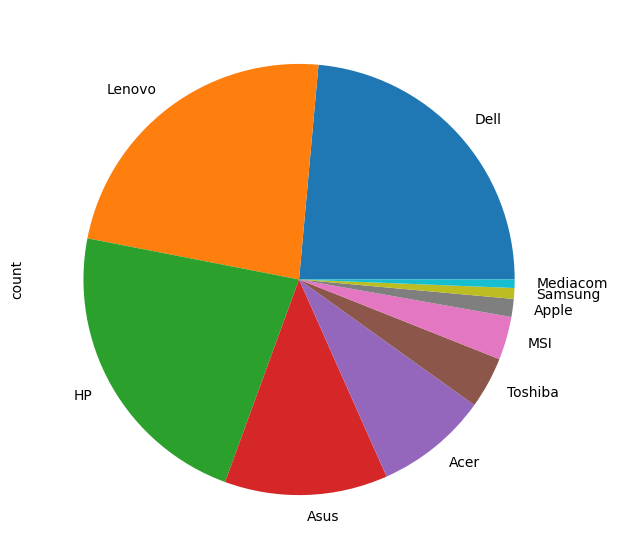

In [ ]:
plt.figure(figsize=(10,7))
df['Company'].value_counts().head(10).plot(kind='pie')
plt.show()
 # ------Dell is the most common data present followed by Lenovo and HP.----#

Which are the available models under each brand ?

In [ ]:
pd.set_option('display.max_colwidth',None)
models=df_cleaned.groupby('Company').agg({'TypeName':lambda x: set(x)})
models

,TypeName
Company,
Acer,"{Netbook, Gaming, 2 in 1 Convertible, Ultrabook, Notebook}"
Apple,{Ultrabook}
Asus,"{Netbook, Gaming, 2 in 1 Convertible, Ultrabook, Notebook}"
Chuwi,{Notebook}
Dell,"{Netbook, Gaming, Workstation, 2 in 1 Convertible, Ultrabook, Notebook}"
Fujitsu,{Notebook}
Google,{Ultrabook}
HP,"{Netbook, Gaming, Workstation, 2 in 1 Convertible, Ultrabook, Notebook}"
Huawei,{Ultrabook}


Which Model is most present in the Dataset ?

In [ ]:
df.TypeName.sort_values(ascending=True).unique()

array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'], dtype=object)

<Axes: ylabel='TypeName'>

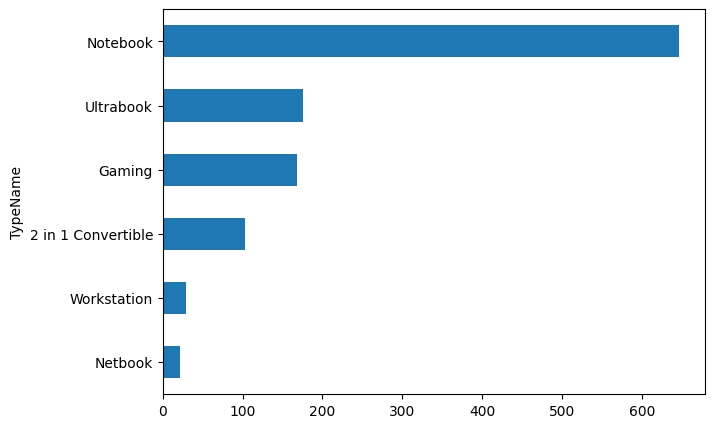

In [ ]:
df['TypeName'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(7,5))

# ---- Notebook category TypeName is most common followed by Ultrabook and Gaming --- #

Which are the processor brands present in the dataset and which is the most present one ?

In [ ]:
df['Processor'].unique()

array(['Intel Celeron', 'Intel Core i5', 'Intel Core i7', 'Intel Core i3',
       'Intel Pentium', 'AMD A10-Series', 'AMD A12-Series',
       'AMD A8-Series', 'AMD A9-Series', 'Other Intel Processor',
       'AMD FX', 'AMD Ryzen', 'AMD E-Series', 'Intel Atom',
       'AMD A6-Series', 'AMD A4-Series', 'Samsung Cortex'], dtype=object)

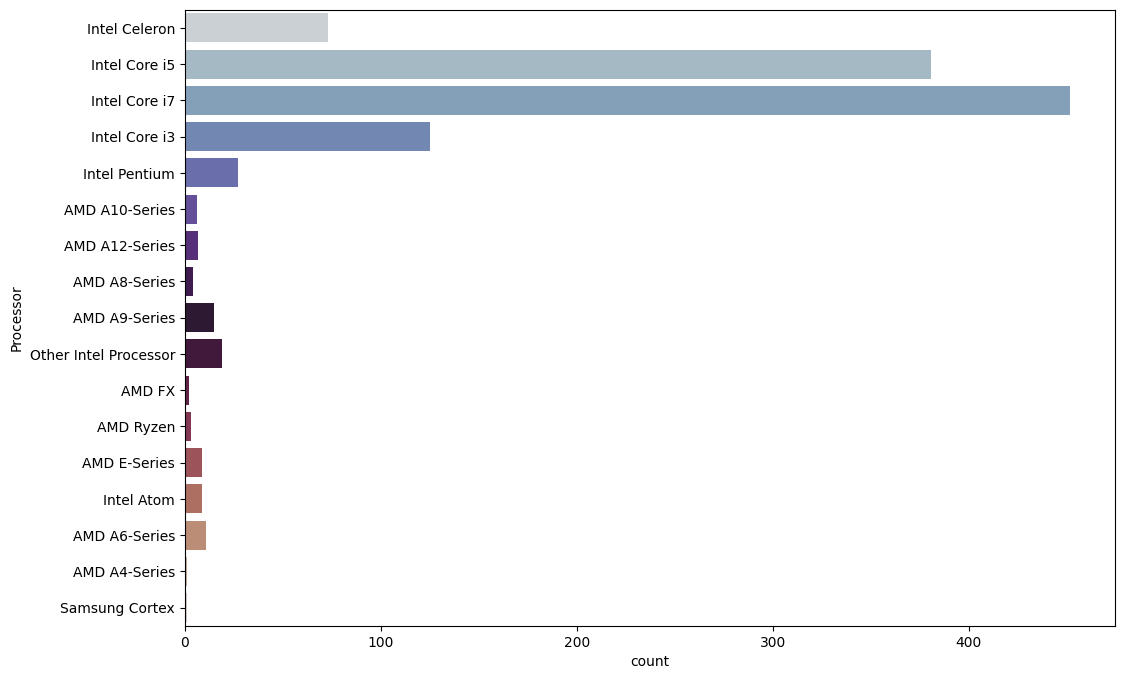

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y=df['Processor'], palette = 'twilight'  )
plt.show()

# ---processor Intel Core i7 is commonly found data followed by Intel Core i5 and Intel Celeron ---

<Axes: xlabel='TypeName', ylabel='Price'>

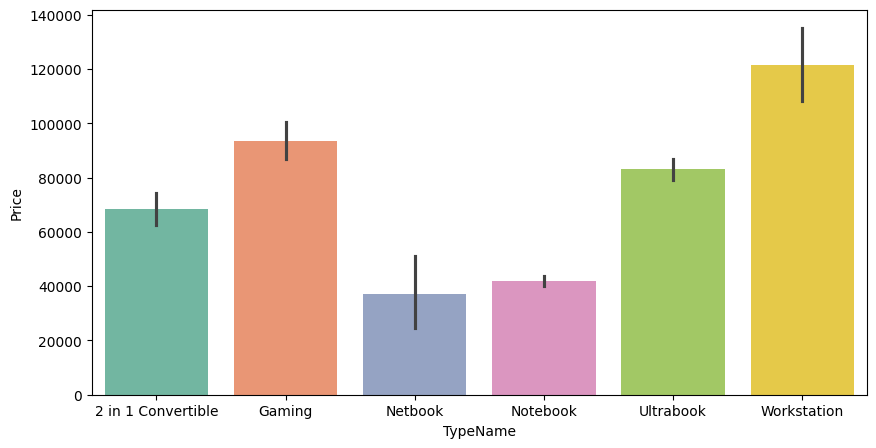

In [ ]:
plt.subplots(figsize=(10,5))
sns.barplot(x='TypeName',y='Price',data=df, palette='Set2')

#black lines: error bars (technically, confidence intervals).
# They give a quick visual sense of data variability.
# Long error bars → high variation (data not consistent).
# Short error bars → values are close to the mean (data consistent).

As can be seen, on average, workstation laptops are higher priced than other category of laptops. This is to be expected as workstation laptops have higher spec configurations (better cpu, more memory, faster clockspeed, etc) to meet the demands of clients in the proffesional workspace.

Gaming laptops present the second highest priced category of laptops due to the same reasons as above.

Ultrabooks and 2 in 1 convertibles are cheaper than gaming laptops (on average).

Notebooks and netbooks are relatively cheaper than other category of laptops.

<Axes: xlabel='Inches', ylabel='Price'>

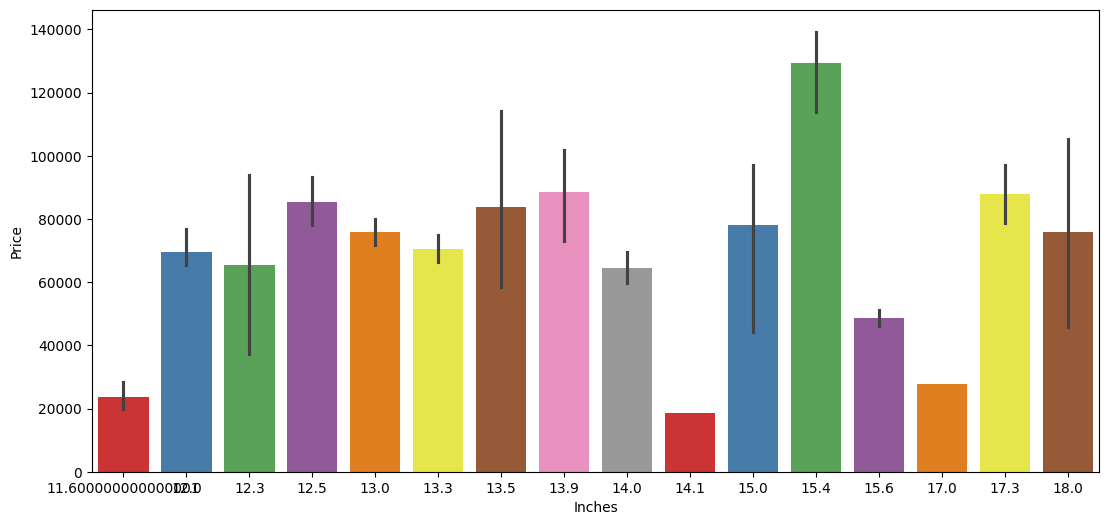

In [ ]:
plt.subplots(figsize=(13,6))
sns.barplot(x='Inches',y='Price',data=df, palette ='Set1')

Here we can see that the price of laptops can't solely be judge through the size of their displays (no direct linear correlation between screen size and price). This feature will still be kept for modelling later (high variance).

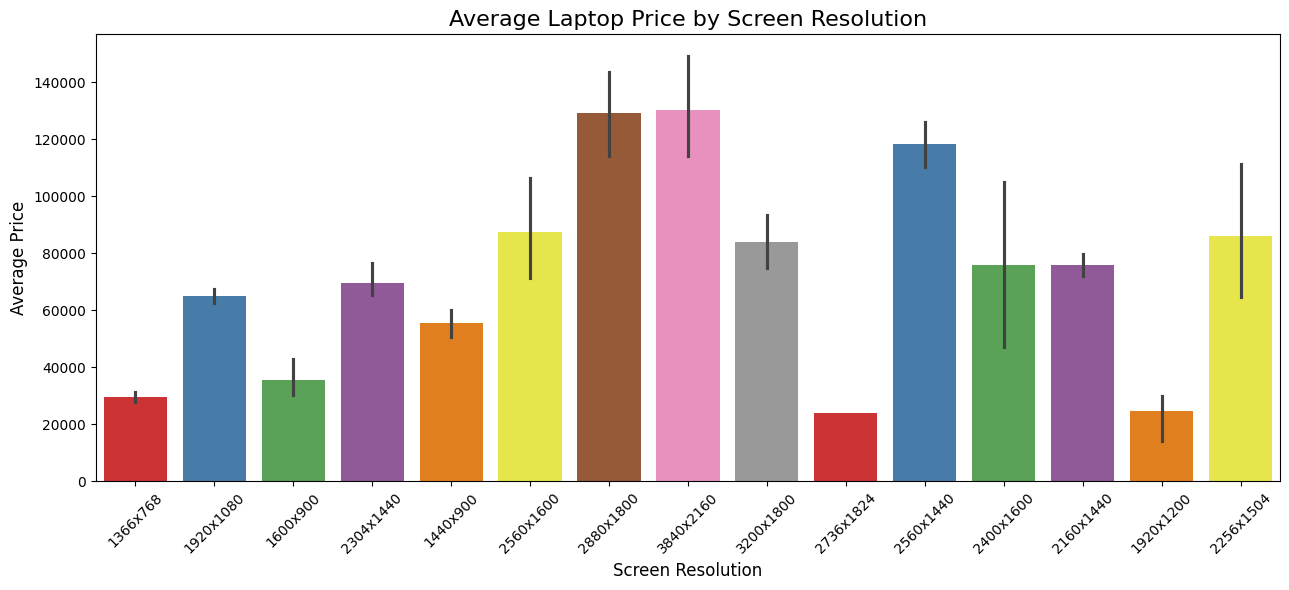

In [ ]:
df['Resolution'] = df['X_res'].astype(str) + 'x' + df['Y_res'].astype(str)

plt.subplots(figsize=(13,6))
sns.barplot(x='Resolution',y='Price',data=df, palette ='Set1')
plt.title('Average Laptop Price by Screen Resolution', fontsize=16)
plt.xlabel('Screen Resolution', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# # saving the cleaned data with resolutions columns for dashboard later
# df_cleaned.to_csv('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/cleaned_laptop_data2.csv', index=False)

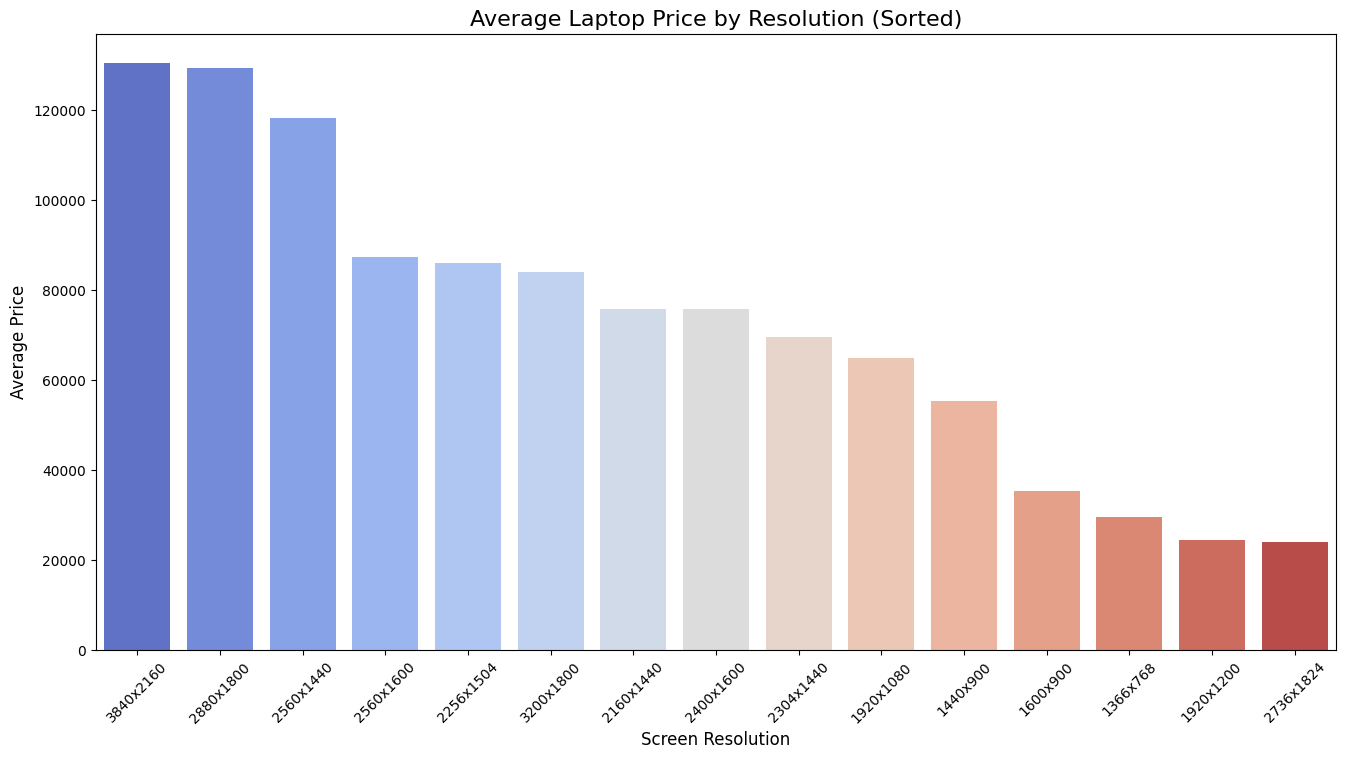

In [ ]:
avg_res_price = df.groupby('Resolution')['Price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16,8))
sns.barplot(x='Resolution', y='Price', data=avg_res_price, palette='coolwarm')
plt.title('Average Laptop Price by Resolution (Sorted)', fontsize=16)
plt.xlabel('Screen Resolution', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# sorted to understand

Screens have higher resolutions are generally higher priced. However , an outlier resolution , specifically (2736 * 1824) is lower priced than others.

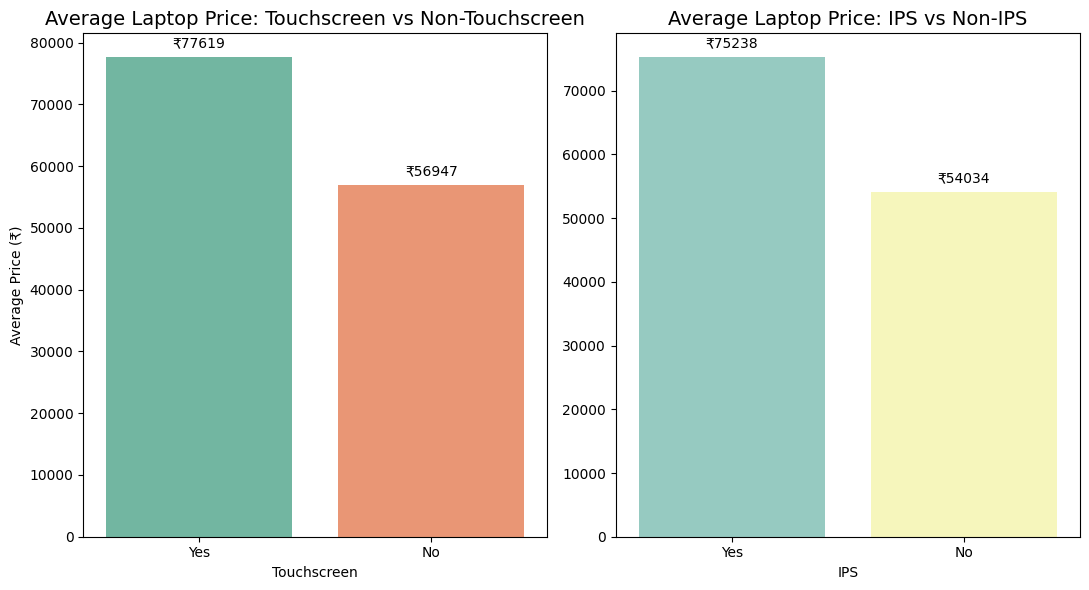

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Touchscreen', 'IPS']
titles = ['Touchscreen vs Non-Touchscreen', 'IPS vs Non-IPS']
palettes = ['Set2', 'Set3']

fig, axes = plt.subplots(1, 2, figsize=(11,6))

for i, feature in enumerate(features):
    ax = axes[i]
    sns.barplot(
        x=df[feature].map({0:'No', 1:'Yes'}),
        y='Price',
        data=df,
        ci=None,
        palette=palettes[i],
        ax=ax
    )
    ax.set_title(f'Average Laptop Price: {titles[i]}', fontsize=14)
    ax.set_xlabel(feature, fontsize=10)
    if i == 0:  # only left plot shows y-label
        ax.set_ylabel('Average Price (₹)', fontsize=10)
    else:
        ax.set_ylabel('')
    # Add labels
    for p in ax.patches:
        ax.annotate(f"₹{p.get_height():.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, xytext=(0,5), textcoords='offset points')

plt.tight_layout()
plt.show()


Laptops with touchscreen capabilities and IPS are priced higher on average.

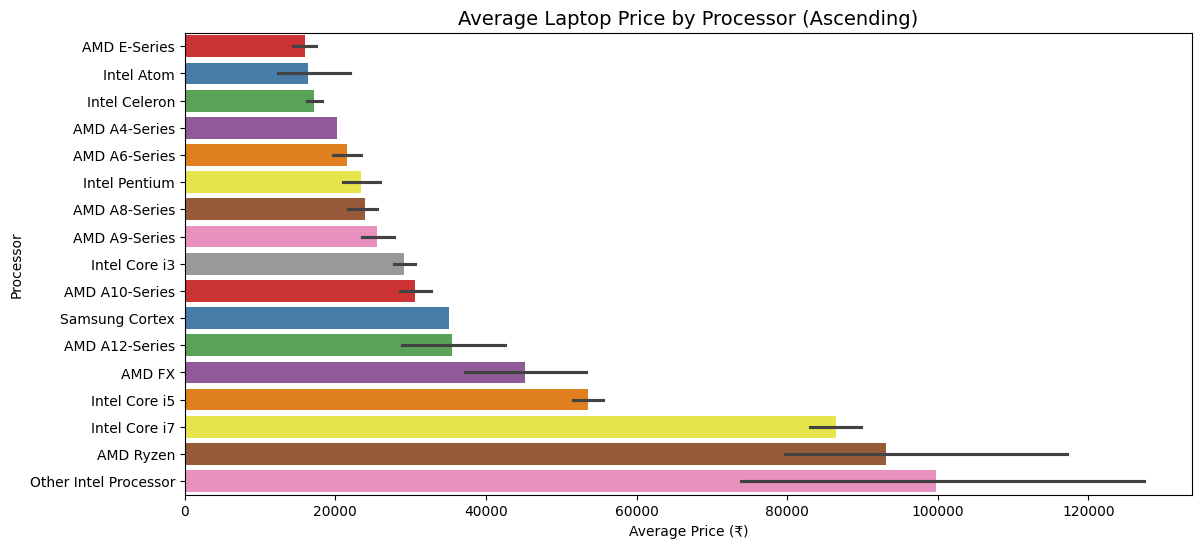

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(
    y='Processor',
    x='Price',
    data=df,
    palette='Set1',
    order=df.groupby('Processor')['Price'].mean().sort_values(ascending=True).index
)
plt.title('Average Laptop Price by Processor (Ascending)', fontsize=14)
plt.xlabel('Average Price (₹)')
plt.ylabel('Processor')
plt.show()


Intel Atom < Intel Celeron < Intel Pentium ≈ AMD E-Series < Intel Core i3 ≈ AMD A4/A6/A8/A9 < Samsung Cortex (very low))
< Intel Core i5 ≈ AMD A10/A12/AMD FX < Intel Core i7 ≈ AMD Ryzen < Other Intel (depends)  -- mapping according to processor performance hierarchy


Higher powered processors/CPU are generally higher priced (AMD Ryzen > i7>i5>i3). The same goes for AMD CPus (Ryzen > AMD A series> E series...).

 the price of i7 processor is high, then of i5 processor, i3 and AMD processor lies at the almost the same range. Hence price will depend on the preprocessor.

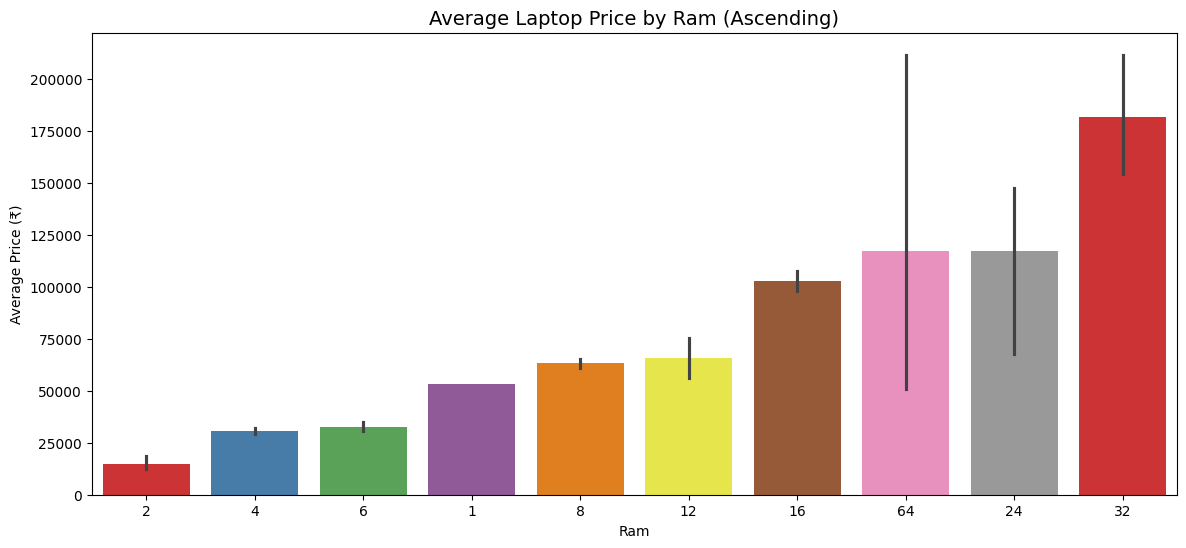

In [ ]:
plt.subplots(figsize=(14,6))
sns.barplot(x='Ram',y='Price',data=df, palette='Set1',
    order=df.groupby('Ram')['Price'].mean().sort_values(ascending=True).index
)
plt.title('Average Laptop Price by Ram (Ascending)', fontsize=14)
plt.ylabel('Average Price (₹)')
plt.xlabel('Ram')
plt.show()

laptops with higher ram shows higher prices, RAM with 64 has a lot of variability in terms of price range

 Price is having a very strong positive correlation with Ram or you can say a linear relationship.

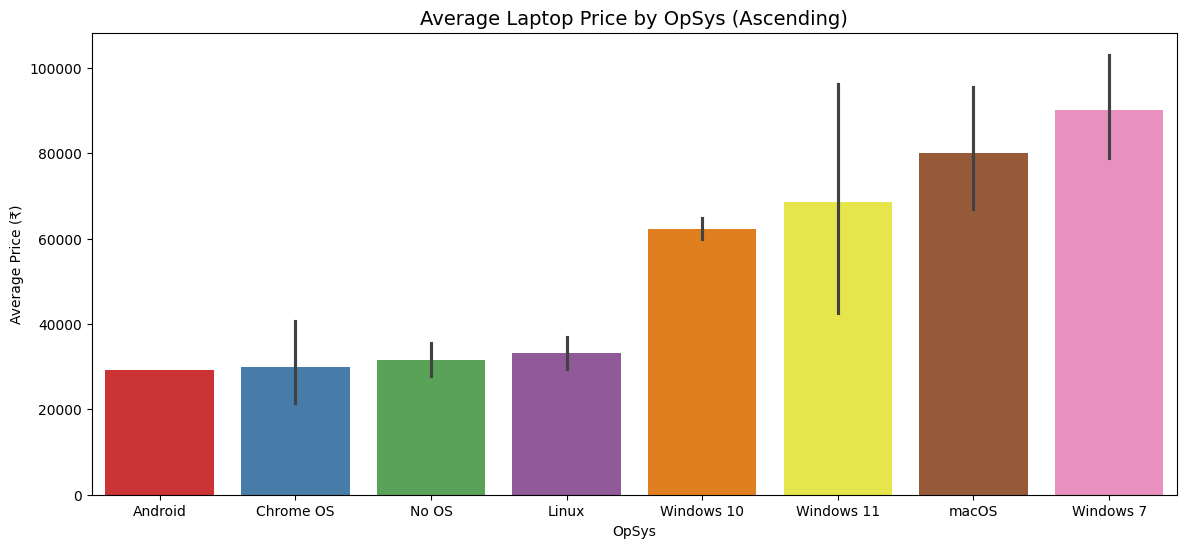

In [ ]:
plt.subplots(figsize=(14,6))
sns.barplot(x='OpSys',y='Price',data=df, palette='Set1',
    order=df.groupby('OpSys')['Price'].mean().sort_values(ascending=True).index
)
plt.title('Average Laptop Price by OpSys (Ascending)', fontsize=14)
plt.ylabel('Average Price (₹)')
plt.xlabel('OpSys')
plt.show()

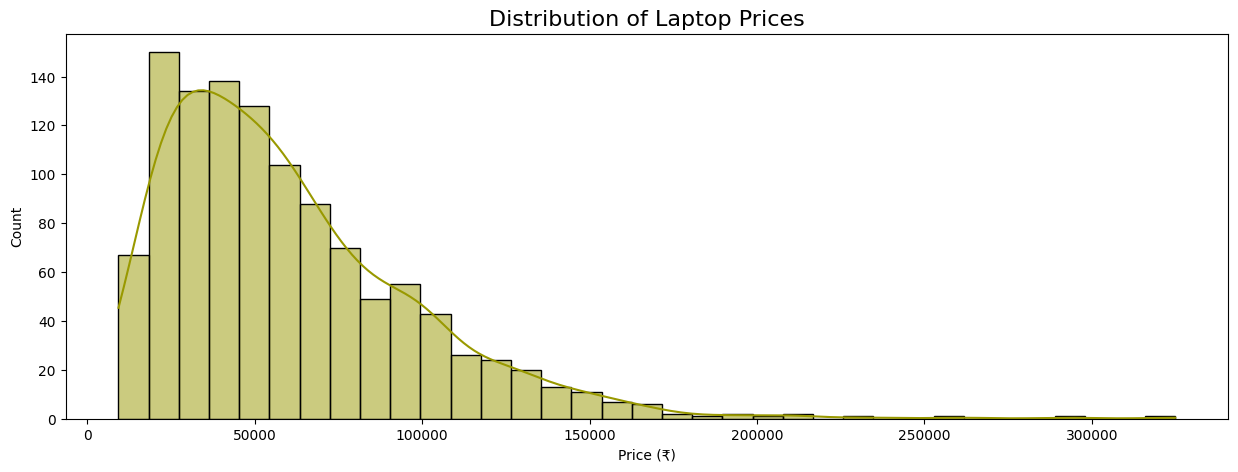

Skewness: 1.59


In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df_cleaned['Price'], kde=True, color='#999900')
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.show()

# Check skewness
print('Skewness:', round(df_cleaned['Price'].skew(), 2))

The distribution of the target variable is skewed and it is obvious that commodities with low prices are sold and purchased more than the branded ones.

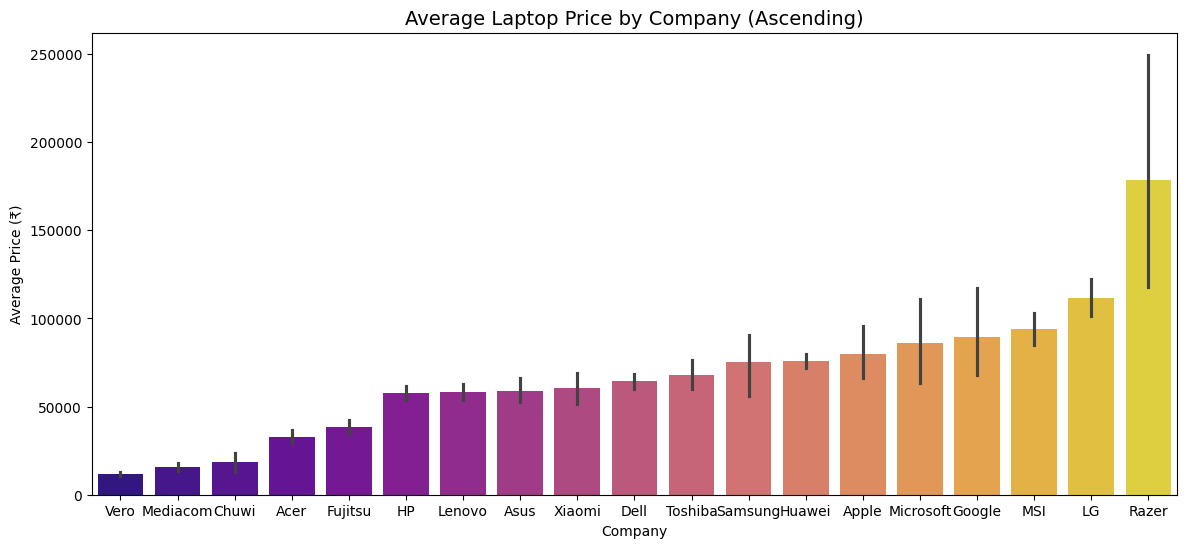

In [ ]:
#what is avg price of each brand?
plt.subplots(figsize=(14,6))
sns.barplot(x=df['Company'], y=df['Price'], palette ='plasma',
    order=df.groupby('Company')['Price'].mean().sort_values(ascending=True).index
)
plt.title('Average Laptop Price by Company (Ascending)', fontsize=14)
plt.ylabel('Average Price (₹)')
plt.xlabel('Company')
plt.show()

Razer, LG, Microsoft, Google, MSI,Apple laptops are expensive, and others are in the budget range.

---

**Questions to Explore:**

1. Which features have the most significant impact on laptop prices?

2. Can the model accurately predict the prices of laptops from lesser-known brands?

3. Does the brand of the laptop significantly influence its price?

4. How well does the model perform on laptops with high-end specifications compared to budget laptops?

5. What are the limitations and challenges in predicting laptop prices accurately?

6. How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

**1. Which features have the most significant impact on laptop prices?**

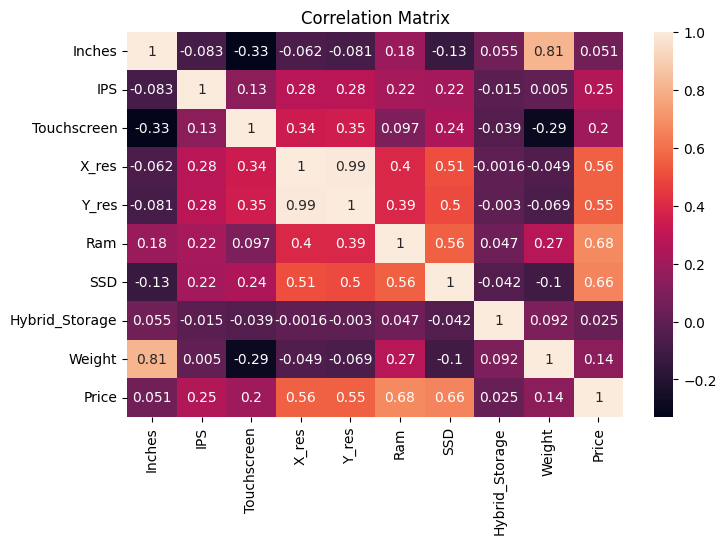

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Matrix')
plt.show()

# df.corr(numeric_only=True)['Price'] same as below

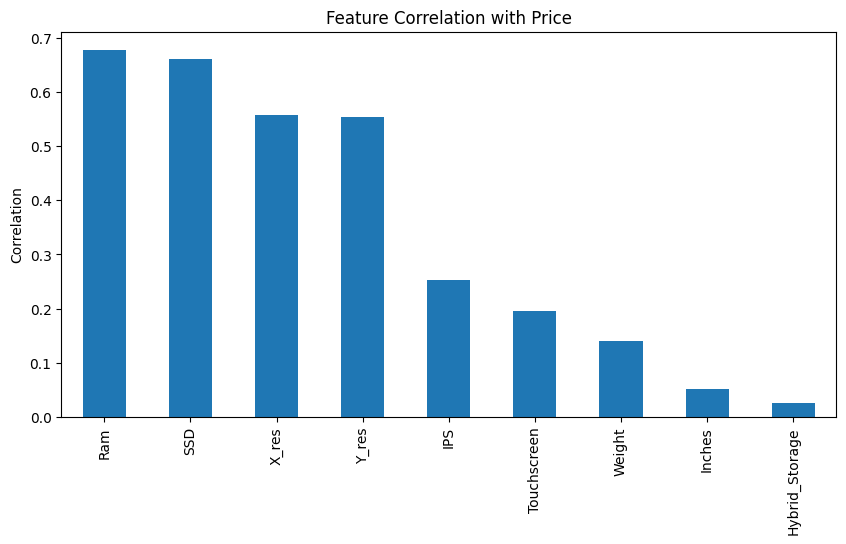

In [ ]:
# Compute correlation of numeric features with Price
feature_corr = df.corr(numeric_only=True)['Price'].drop('Price')  # drop self-correlation

# Plot as column chart
feature_corr.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Correlation with Price')
plt.ylabel('Correlation')
plt.show()

With respect to the price point, RAM, SSD and Screen resolution have the biggest impact on the laptop prices. Also as seen earlier with categorical columns - processors/CPU, IPS and touchscreen impact the price point

**2. Can the model accurately predict the prices of laptops from lesser-known brands?**

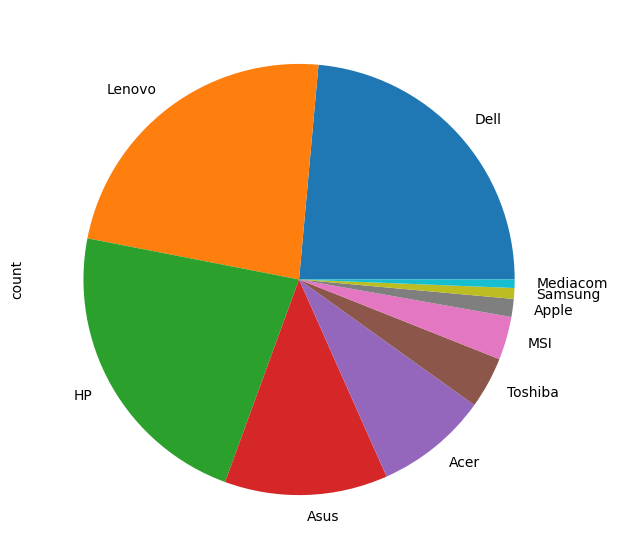

In [ ]:
plt.figure(figsize=(7,7))
df['Company'].value_counts().head(10).plot(kind='pie')
plt.show() # check according to our dataset which company count are lesser known as few brands are under represented

In [ ]:
# Count of laptops per brand
brand_counts = df['Company'].value_counts()
pd.DataFrame({
    'Company': brand_counts.index,
    'Count': brand_counts.values,
    'Category': ['Popular' if x >= 50 else 'Lesser-known' for x in brand_counts.values]
})


,Company,Count,Category
0,Dell,262,Popular
1,Lenovo,260,Popular
2,HP,250,Popular
3,Asus,136,Popular
4,Acer,94,Popular
5,Toshiba,43,Lesser-known
6,MSI,36,Lesser-known
7,Apple,15,Lesser-known
8,Samsung,9,Lesser-known
9,Mediacom,7,Lesser-known


In [ ]:
# Display lesser-known brands so as to try prediction with them
lesser_known_brands = brand_counts[brand_counts < 50].index
print("\nLesser-known brands (<50 laptops):")
print(list(lesser_known_brands))


Lesser-known brands (<50 laptops):
['Toshiba', 'MSI', 'Apple', 'Samsung', 'Mediacom', 'Razer', 'Microsoft', 'Vero', 'Xiaomi', 'Google', 'LG', 'Huawei', 'Chuwi', 'Fujitsu']


In [ ]:
def predict_laptop_price(user_input):
    input_df = pd.DataFrame([user_input], columns=columns)
    predicted_log_price = pipe.predict(input_df)[0]
    predicted_price = np.exp(predicted_log_price)
    return round(predicted_price, 2)

# for interactive interface:
user_input = []
columns = columns = ['Company','TypeName','OpSys','Processor','Inches','Display','IPS','Touchscreen',
               'X_res','Y_res','Ram','SSD','Hybrid_Storage','Gpu_Brand','Weight']  # match training columns

for col in columns:
    val = input(f"Enter {col}: ")

    if col in ['Ram','SSD','Hybrid_Storage','Inches','Weight','X_res','Y_res']:
        val = float(val)
    # Convert binary fields
    elif col in ['IPS','Touchscreen']:
        if val.lower() in ['yes','1','true']:
            val = 1
        else:
            val = 0
    user_input.append(val)


# prediction
predicted_price = predict_laptop_price(user_input)
print(f"\nEstimated Laptop Price: ₹ {predicted_price}")

Enter Company: Huawei
Enter TypeName: Ultrabook
Enter OpSys: Windows 10
Enter Processor: Intel Core i5
Enter Inches: 14
Enter Display: Full HD 
Enter IPS: 0
Enter Touchscreen: 0
Enter X_res: 1920
Enter Y_res: 1080
Enter Ram: 8
Enter SSD: 512
Enter Hybrid_Storage: 0
Enter Gpu_Brand: Intel
Enter Weight: 1.5

Estimated Laptop Price: ₹ 73935.72


In [ ]:
## --------------------TRIAL 1------------------------
# Fujitsu	Notebook	Windows 10	Intel Core i5	15.6	Normal	0	0	1366	768	8	256	0	Intel	2.2

# Estimated Laptop Price: ₹ 39091.63 tuned model  -- closer prediction
# Estimated Laptop Price: ₹ 46170.82  untuned model
# correct price: 42570.72

In [ ]:
## --------------------TRIAL 2------------------------

# LG	Ultrabook	Windows 10	Intel Core i7	15.6	Full HD	1	0	1920	1080	8	512	0	Intel	1.09	122490.72

# Estimated Laptop Price: ₹ 84032.25 tuned model
# Estimated Laptop Price: ₹ 121690.96  untuned model -- closer prediction
# correct price: 122490.72

In [ ]:
##  --------------------TRIAL 3---------with a latest model from Amazon but a lesser know brand
# https://www.amazon.in/Refurbished-Huawei-Ultrabook-i5-1135G7-KelvinD-WDH9A/dp/B0CGXB89MR/ref=sr_1_3?dib=eyJ2IjoiMSJ9.U4tbanKA1wg3LnH22z4YMAYSVRwBExCOzJ30LeWJVvpyYhx2VPXtzk8hSfkZrY6_k3AkVd9Z2qrUDUjJfMFhGVdIoSuwIvHrdQcv_tzup2zzdEoHDCfps4ZMt9HyLZRxoFbtSleTglz-xcc1v81Xl3OdhSshfyvIng3vesc0Xv1eyLkVFtzU-Tf3--6CeXfqLP45BdZX0ILuJVbw6o--cEIGwp7H_b4m5-RmxxVnPN0.SIKYfObsxfX_feX4Tkg_Ixjiaesu1e_KAzGbySpbJAE&dib_tag=se&keywords=Huawei+Laptop&qid=1761059426&sr=8-3

# Huawei Ultrabook Windows 10 Intel Core i5 14 Full HD 0 0 1920 1080 8 512 0 Intel 1.5

# Estimated Laptop Price: ₹ 59391.87 tuned model  -- closer prediction
# Estimated Laptop Price: ₹ 73935.72  untuned model
# correct price: 54,730 refurbished - ₹1,09,990

Tested the GB model with 3 lesser known in dataset laptop brands with:
1. Fujitsu : The model predicts well even though the brand has fewer data points.
   - Estimated Laptop Price: ₹ 39091.63 tuned model  -- closer prediction
   - Estimated Laptop Price: ₹ 46170.82  untuned model
   - correct price: 42570.72

2. LG : The model underestimates the price significantly due to under representation
   - Estimated Laptop Price: ₹ 84032.25 tuned model
   - Estimated Laptop Price: ₹ 121690.96  untuned model -- closer prediction
   - correct price: 122490.72

3. Huawei- From Amazon details : The model overestimates the price by ~₹18.5k
   - Estimated Laptop Price: ₹ 59391.87 tuned model  -- closer prediction
   - Estimated Laptop Price: ₹ 73935.72  untuned model
   - correct price: 54,730 refurbished - ₹1,09,990


Conclusion: The Gradient Boosting tuned model performs well with most of the popular brands but is less reliable for brands with fewer examples in the dataset. For instance, Fujitsu and Huawei was predicted closely accurate , while LG laptops showed higher errors due to underrepresentation in actual prices( but worked worked  best with untuned GB model). This suggests that the model’s accuracy for lesser-known brands depends heavily on the availability and diversity of data.

**3. Does the brand of the laptop significantly influence its price?**

In [ ]:
# Group by brand  and checking its average prices
pd.DataFrame({
    'Count': df['Company'].value_counts(),
    'Average_Price': df.groupby('Company')['Price'].mean()
}).sort_values('Average_Price', ascending=False)


,Count,Average_Price
Company,,
Razer,7,178282.491429
LG,3,111834.720000
MSI,36,94130.503667
Google,3,89386.080000
Microsoft,6,85903.788000
Apple,15,80050.459040
Huawei,2,75870.720000
Samsung,9,75308.320000
Toshiba,43,67842.167442


In [ ]:
# Since brand is categorical and price is numeric, ANOVA statistical tool helps
from scipy.stats import f_oneway

brands = df['Company'].unique()
price_groups = [df[df['Company'] == b]['Price'] for b in brands]

f_stat, p_val = f_oneway(*price_groups)
print("F-statistic:", f_stat)
print("p-value:", p_val)
# Interpretation:
# p-value < 0.05 → Brand significantly affects price.
# p-value > 0.05 → No significant effect detected.

F-statistic: 12.423788658640548
p-value: 8.281165468007725e-34


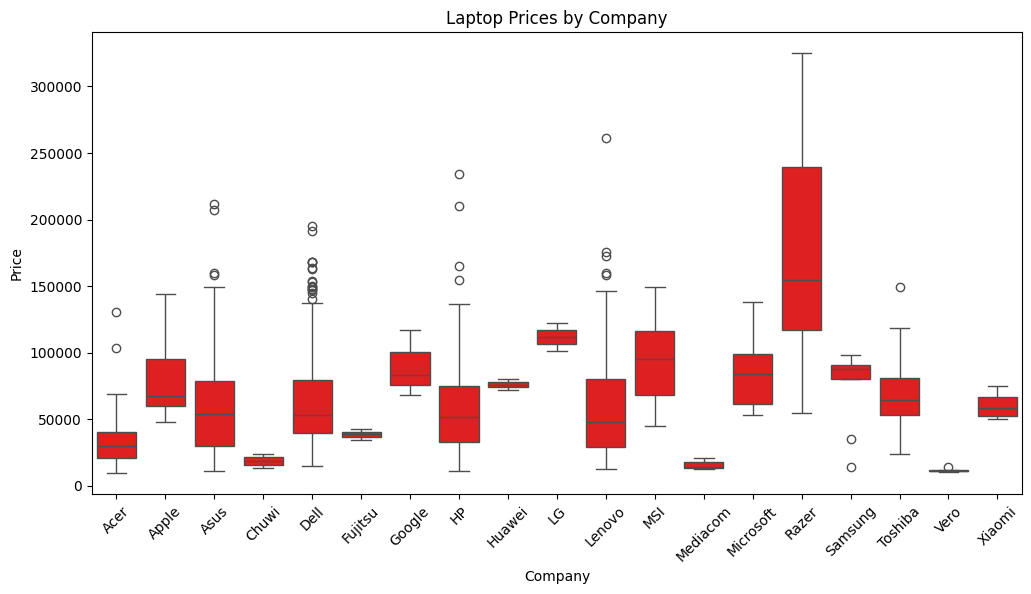

In [ ]:
# boxplot visualization
plt.figure(figsize=(12,6))
sns.boxplot(x='Company', y='Price', data=df, color='red')
plt.xticks(rotation=45)
# plt.xticks(rotation="vertical")
plt.title('Laptop Prices by Company')
plt.show()


Observations:
- High-end brands: Apple, Razer, Microsoft → higher median prices.
- Budget brands: Acer, Chuwi, Vero → lower median prices.
- Some brands have wide spread (e.g., Asus, Lenovo, MSI), meaning their laptops range from budget to premium.
- Outliers are visible, e.g., very expensive laptops for Asus or Razer.
- some brands are consistently more expensive.

Conclusion: Both the boxplot and ANOVA analysis show that laptop brand significantly affects price. Premium brands like Apple, Razer, and Microsoft have higher median prices, while budget brands like Acer, Chuwi, and Vero are lower. ANOVA confirms this statistically, with an F-statistic of 12.42 and a p-value < 0.0001, indicating strong evidence that brand influences price

**4. How well does the model perform on laptops with high-end specifications compared to budget laptops?**

In [ ]:
# Split laptops into price-based tiers
def price_tier(price):
    if price < 50000:
        return 'Budget'
    elif price < 100000:
        return 'Mid-range'
    else:
        return 'High-end'

df['Tier'] = df['Price'].apply(price_tier)

In [ ]:
# creating a predicted price column in my df

# to load the pickle
# model = joblib.load('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/gb_tuned_model.pkl')

#feature columns
feature_columns = ['Company','TypeName','OpSys','Processor','Inches','Display','IPS','Touchscreen',
               'X_res','Y_res','Ram','SSD','Hybrid_Storage','Gpu_Brand','Weight']
X = df[feature_columns]
model=pipe
# Predict prices
df['Predicted_Price_untunedGB'] = np.expm1(model.predict(X))

print(df[['Price', 'Predicted_Price_untunedGB']].sample(4))


           Price  Predicted_Price_untunedGB
841   13445.7408               13752.313730
392   38787.8400               40241.119399
438  101178.7200               97078.155768
600   34632.0000               31903.918445


In [ ]:
# creating MAE column - the average difference between the actual laptop price and the predicted price.
df['UntunedGB_Error'] = abs(df['Price'] - df['Predicted_Price_untunedGB'])

In [ ]:
df.head()

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,...,Hybrid_Storage,Gpu_Brand,Weight,Price,Resolution,Tier,Predicted_Price,Error,Predicted_Price_untunedGB,UntunedGB_Error
0,Acer,2 in 1 Convertible,Chrome OS,Intel Celeron,11.6,Normal,1,1,1366,768,...,0,Intel,1.25,20459.52,1366x768,Budget,18885.991546,1573.528454,18020.437194,2439.082806
1,Acer,2 in 1 Convertible,Windows 10,Intel Celeron,11.6,Full HD,1,1,1920,1080,...,0,Intel,1.25,18594.72,1920x1080,Budget,19326.653431,731.933431,19051.586536,456.866536
2,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,...,0,Intel,1.60,53226.72,1920x1080,Mid-range,45345.297527,7881.422473,52118.103691,1108.616309
3,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,...,0,Intel,1.50,45128.16,1920x1080,Budget,47185.830903,2057.670903,47354.226825,2226.066825
4,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920,1080,...,0,Intel,1.60,36709.92,1920x1080,Budget,43551.712614,6841.792614,43116.976816,6407.056816


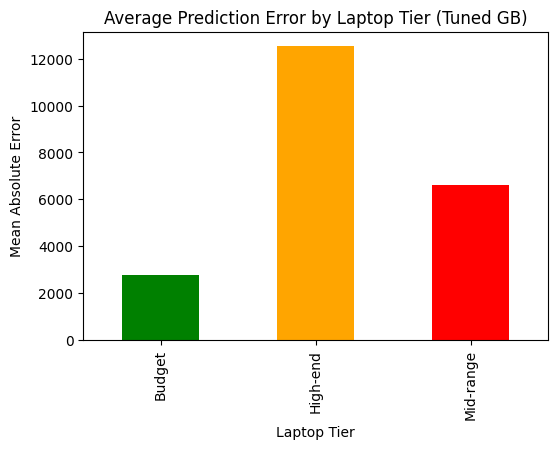

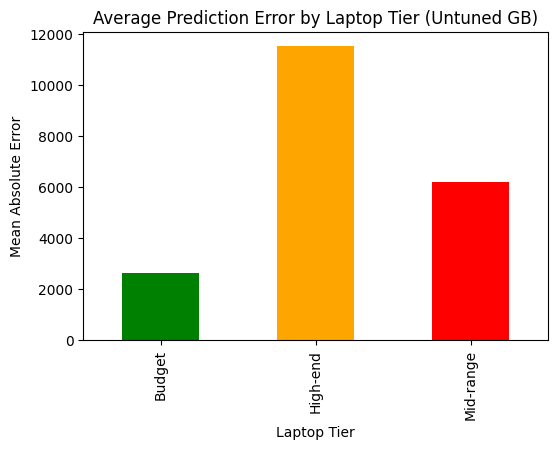

In [ ]:
# Average error per tier
df.groupby('Tier')['Error'].mean().plot(kind='bar', color=['green', 'orange', 'red'], figsize=(6,4))
plt.title('Average Prediction Error by Laptop Tier (Tuned GB)')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Laptop Tier')
plt.show()

# Untuned model error
df.groupby('Tier')['UntunedGB_Error'].mean().plot(kind='bar',  color=['green', 'orange', 'red'], figsize=(6,4))
plt.title('Average Prediction Error by Laptop Tier (Untuned GB)')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Laptop Tier')
plt.show()

Interpretation of both tuned and untuned Gradient boost regressor(similar):

1. Budget laptops (green bar):

   - Lowest MAE (~₹30,000)

   - The model predicts budget laptop prices most accurately.

2. Mid-range laptops (red bar):

    - Higher MAE (~₹70,000)

    - Predictions are less accurate here compared to budget laptops.

3. High-end laptops (orange bar):

    - Highest MAE (~₹1,30,000)

    - The model struggles the most with expensive laptops. Predictions deviate significantly from actual prices.

Conclusion:
- High-end laptops often have more variability in features (gaming GPUs, premium displays, unusual specs), making them harder for the model to predict.

- Budget laptops are more standardized, so predictions are closer to the true prices.

### saving the final dataset - cleaned_laptop_data_final.csv

- rearranged columns, renamed and saved

In [ ]:
final_columns = [
    'Company', 'TypeName', 'OpSys', 'Processor',
    'Inches', 'Display', 'IPS', 'Touchscreen',
    'Resolution', 'X_res', 'Y_res', 'Ram', 'SSD', 'Hybrid_Storage',
    'Gpu_Brand', 'Weight', 'Tier',
    'Price', 'Predicted_Price', 'Error',
    'Predicted_Price_untunedGB', 'UntunedGB_Error'
]

rename_map = {
    'Predicted_Price': 'Pred_Price_TunedGB',
    'Predicted_Price_untunedGB': 'Pred_Price_UntunedGB',
    'Error': 'TunedGB_Error',
    'UntunedGB_Error': 'UntunedGB_Error_Value'
}
# Reorder and rename columns
df_final = df[final_columns].rename(columns=rename_map)

# Save as CSV
df_final.to_csv('/content/drive/MyDrive/OdinSchool/ML/Capstone_project2/cleaned_laptop_data_final.csv', index=False)

In [ ]:
df_final.head()

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,Resolution,X_res,...,SSD,Hybrid_Storage,Gpu_Brand,Weight,Tier,Price,Pred_Price_TunedGB,TunedGB_Error,Pred_Price_UntunedGB,UntunedGB_Error_Value
0,Acer,2 in 1 Convertible,Chrome OS,Intel Celeron,11.6,Normal,1,1,1366x768,1366,...,0,0,Intel,1.25,Budget,20459.52,18885.991546,1573.528454,18020.437194,2439.082806
1,Acer,2 in 1 Convertible,Windows 10,Intel Celeron,11.6,Full HD,1,1,1920x1080,1920,...,0,0,Intel,1.25,Budget,18594.72,19326.653431,731.933431,19051.586536,456.866536
2,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920x1080,1920,...,256,0,Intel,1.60,Mid-range,53226.72,45345.297527,7881.422473,52118.103691,1108.616309
3,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920x1080,1920,...,256,0,Intel,1.50,Budget,45128.16,47185.830903,2057.670903,47354.226825,2226.066825
4,Acer,2 in 1 Convertible,Windows 10,Intel Core i5,13.3,Full HD,1,1,1920x1080,1920,...,256,0,Intel,1.60,Budget,36709.92,43551.712614,6841.792614,43116.976816,6407.056816


**5. What are the limitations and challenges in predicting laptop prices accurately?**


Several limitations and challenges account in predicting laptop prices accurately:
  - Data quality issues such as limited, outdated or biased or imbalanced data affect prediction accuracy
  - Price fluctuations that occur frequently due to new release, market changes
  - Complex feature relationships needing careful engineering and encoding.
  - Hyperparameter tuning complexity, generalization and risk of overfitting.
  - Handling new or rare laptop features not in training data.
  - External factions like discounts, vendor strategies, and geography not captured.

**6. How does the model perform when predicting the prices of newly released laptops not present in the training dataset?**

In [ ]:
def predict_laptop_price(user_input):
    input_df = pd.DataFrame([user_input], columns=columns)
    predicted_log_price = pipe.predict(input_df)[0]
    predicted_price = np.exp(predicted_log_price)
    return round(predicted_price, 2)

# for interactive interface:
user_input = []
columns = columns = ['Company','TypeName','OpSys','Processor','Inches','Display','IPS','Touchscreen',
               'X_res','Y_res','Ram','SSD','Hybrid_Storage','Gpu_Brand','Weight']  # match training columns

for col in columns:
    val = input(f"Enter {col}: ")

    if col in ['Ram','SSD','Hybrid_Storage','Inches','Weight','X_res','Y_res']:
        val = float(val)
    # Convert binary fields
    elif col in ['IPS','Touchscreen']:
        if val.lower() in ['yes','1','true']:
            val = 1
        else:
            val = 0
    user_input.append(val)


# prediction
predicted_price = predict_laptop_price(user_input)
print(f"\nEstimated Laptop Price: ₹ {predicted_price}")

In [ ]:
##  --------------------TRIAL 3---------with a latest model from Amazon but a lesser know brand
# https://www.amazon.in/Refurbished-Huawei-Ultrabook-i5-1135G7-KelvinD-WDH9A/dp/B0CGXB89MR/ref=sr_1_3?dib=eyJ2IjoiMSJ9.U4tbanKA1wg3LnH22z4YMAYSVRwBExCOzJ30LeWJVvpyYhx2VPXtzk8hSfkZrY6_k3AkVd9Z2qrUDUjJfMFhGVdIoSuwIvHrdQcv_tzup2zzdEoHDCfps4ZMt9HyLZRxoFbtSleTglz-xcc1v81Xl3OdhSshfyvIng3vesc0Xv1eyLkVFtzU-Tf3--6CeXfqLP45BdZX0ILuJVbw6o--cEIGwp7H_b4m5-RmxxVnPN0.SIKYfObsxfX_feX4Tkg_Ixjiaesu1e_KAzGbySpbJAE&dib_tag=se&keywords=Huawei+Laptop&qid=1761059426&sr=8-3

# Huawei Ultrabook Windows 10 Intel Core i5 14 Full HD 0 0 1920 1080 8 512 0 Intel 1.5

# Estimated Laptop Price: ₹ 59391.87 tuned model
# Estimated Laptop Price: ₹ 73935.72  untuned model
# correct price: 54,730 refurbished - ₹1,09,990

Tested the GB model with a laptop model which isnt on our dataset(amazon)
 Huawei- From Amazon details : The model overestimated the price by : Overestimation: Untuned → ~₹19.2k, Tuned → ~₹4.6k
  - Estimated Price: ₹ 73935.72 (untuned model) and ₹ 59391.87 (tuned model)
  - Actual price:   ₹  54,730 refurbished

Conclusion: Here Huawei laptops showed higher errors due to underrepresentation in actual prices(model may underperform on laptops with rare or unseen configurations, as these were underrepresented in the training data)

---

## **Key Conclusions**
---

**After performing extensive exploratory analysis and building a Gradient Boosting model to predict laptop prices based on their specifications, the following insights and outcomes were observed:**


- **Brand Influence**: Dell, Lenovo, and HP dominate in purchase volume, while Razer, LG, and MSI produce the most premium laptops with higher price points.

- **Type of Laptop**: Notebooks dominate sales, followed by Ultrabooks and Gaming laptops. Gaming laptops and workstations are the most expensive due to higher specs.

- **Operating System**: Windows 10 is the most popular OS but has minimal impact on price; pricing is driven mainly by hardware specs.

- **Processor:** Intel Core i7 laptops occupy the premium range, while models with Intel Core i3 or AMD processors are among the most affordable.

- **Display Quality:** Display quality strongly impacts price. 4K Ultra HD Retina and Quad HD+ displays are premium, while Full HD and lower resolutions are more common and more affordable.

- **Screen Technology**: IPS displays and touchscreen features are popular and associated with higher price points.

- **Weight and Price**: Weight does not directly correlate with price; however, higher-spec models tend to weigh more (typically >3.0 kg).

- **Resolution and Size**: Higher screen resolutions and larger screen sizes correlate positively with price. Most buyers prefer around a 14-inch medium sized screen as well as medium resolutions considering the affordability.

- **RAM**: There is a strong positive correlation between RAM size and price; 8 GB RAM is the most common among buyers. This is a major driver of price.

- **GPU:** Laptops mostly feature Intel GPUs; Nvidia GPUs are premium and increase cost due to better performance.

- **Storage:** SSD and hybrid storage moderately impact price, while HDD and flash storage have minimal influence.



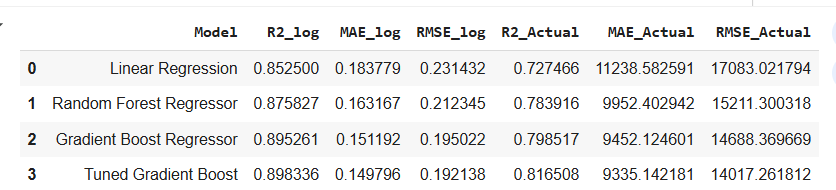

#### **Model Performance and Insights**
---

- **Dataset:** 1145 laptops, 16 features; split into 80% training and 20% testing.

- **Models tested:** Linear Regression, Random Forest, Gradient Boosting (GBR). The Gradient Boosting Regressor outperformed others, and further hyperparameter tuning improved its accuracy and generalization.


| Model          | R² Score  | MAE        | RMSE        |
| -------------- | --------- | ---------- | ---------- |
| **Untuned GB** | 0.895    | 0.1511    | 0.195     |
| **Tuned GB**   | **0.898** | **0.149** | **0.192** |


- The tuned Gradient Boosting model explains about 89.5% of the price variance, with a low mean absolute error, indicating a strong predictive performance without overfitting.
 - RMSE appears small (≈0.192) because it is in log units. After converting predictions back to actual prices, the mean absolute error is on the scale of thousands of rupees, which matches real-world laptop price differences.

**Most influential features:**
- **RAM, Screen Resolution (X_res, Y_res), and SSD capacity** emerged as the top predictors of laptop price..